![texto alternativo](https://metadata.fundacionsadosky.org.ar/media/media/images/MetaData_-_Predicci%C3%B3n_de_%C3%A9xito_-_ECI_Alix.png)


# Predicción de éxitos en oportunidades comerciales 2020

---

Link: https://metadata.fundacionsadosky.org.ar/competition/20/

Author: Mg. Panuccio Abraham Alan

---

## Objetivo

Predicción del éxito de oportunidades comerciales de una empresa de comercialización e instalación de equipos de aire acondicionado para grandes superficies.

Para cumplir este objetivo, se construye un **modelo de clasificación** que aprenda los patrones que tienen en común las oportunidades que fueron exitosas y que las diferencia de aquellas que no tuvieron éxito.

El modelo predice la **probabilidad de éxito** para cada oportunidad comercial **de los últimos 4 meses**, de las cuales no conocemos el resultado real.

## Diccionario de variables


- ID: id único del registro (Entero).
  
- Región: región de la oportunidad (Categórica).
  
- Territory: territorio comercial de la oportunidad (Categórica).
  
- Pricing, Delivery_Terms_Quote_Approval: variable que denomina si la oportunidad necesita aprobación especial de su precio total y los términos de la entrega (Binaria).
  
- Pricing, Delivery_Terms_Approved: variable que denomina si la oportunidad obtuvo aprobación especial de su precio total y los términos de la entrega (Binaria).
  
- Bureaucratic_Code_0_Approval: variable que denomina si la oportunidad necesita el código burocrático 0 (Binaria).
  
- Bureaucratic_Code_0_Approved: variable que denomina si la oportunidad obtuvo el código burocrático 0 (Binaria).
  
- Submitted_for_Approval: variable que denomina si fue entregada la oportunidad para la aprobación (Binaria).
  
- Bureaucratic_Code: códigos burocráticos que obtuvo la oportunidad (Categórica).
  
- Account_Created_Date: fecha de creación de la cuenta del cliente (Datetime).
  
- Source: fuente de creación de la oportunidad (Categórica).
  
- Billing_Country: país donde se emite la factura (Categórica).
  
- Account_Name: nombre de la cuenta del cliente (Categórica).
  
- Opportunity_Name: nombre de la oportunidad (Categórica).
  
- Opportunity_ID: id de la oportunidad (Entero).
  
- Sales_Contract_No: número de contrato (Entero).
  
- Account_Owner: vendedor del equipo comercial responsable de la cuenta cliente (Categórica).
  
- Opportunity_Owner: vendedor del equipo comercial responsable de la oportunidad comercial (Categórica).
  
- Account_Type: tipo de cuenta cliente (Categórica).
  
- Opportunity_Type: tipo de oportunidad (Categórica).
  
- Quote_Type: tipo de presupuesto (Categórica).
  
- Delivery_Terms: términos de entrega (Categórica).
  
- Opportunity_Created_Date: fecha de creación de la oportunidad comercial (Datetime).
  
- Brand: marca del producto (Categórica).
  
- Product_Type: tipo de producto (Categórica).
  
- Size: tamaño del producto (Categórica).
  
- Product_Category_B: categoría 'B' del producto (Categórica).
  
- Price: precio (Decimal).
  
- Currency: moneda (Categórica).
  
- Last_Activity: fecha de la última actividad (Datetime).
  
- Quote_Expiry_Date: fecha de vencimiento del presupuesto (Datetime).
  
- Last_Modified_Date: fecha de ultima modificación en la oportunidad (Datetime).
  
- Last_Modified_By: usuario responsable de la última modificación en la oportunidad (Categórica).
  
- Product_Family: familia de producto (Categórica).
  
- Product_Name: nombre del producto (Categórica).
  
- ASP_Currency: moneda del precio promedio (Categórica).
  
- ASP: (Average Selling Price) precio promedio a la venta (Decimal).
  
- ASP_(converted)_Currency: moneda del precio promedio convertido en la variable (Categórica)
  
- ASP_(converted): precio promedio a la venta convertido a otra moneda (Decimal).
  
- Planned_Delivery_Start_Date: límite inferior del rango previsto para la fecha de entrega (Datetime).
  
- Planned_Delivery_End_Date: límite superior del rango previsto para la fecha de entrega (Datetime).
  
- Month: mes-año de Planned_Delivery_Start_Date (Fecha).
  
- Delivery_Quarter: trimestre de Planned_Delivery_Start_Date (Categorica).
  
- Delivery_Year: año de Planned_Delivery_Start_Date (Fecha).
  
- Actual_Delivery_Date: fecha real de la entrega (Datetime).
  
- Total_Power: potencia del producto (Entero).
  
- Total_Amount_Currency: moneda del monto total (Decimal).
  
- Total_Amount: monto total (Decimal).
  
- Total_Taxable_Amount_Currency: moneda del monto gravado total (Categórica).
  
- Total_Taxable_Amount: monto gravado total (Categórica).
  
- Stage: variable target. Estado de la oportunidad (Categórica).
  
- Prod_Category_A: categoría 'A' del producto (Categórica).
  
- Total_Power_Discreet: categorización de la variable Total Power en bins (Categórica).

## Librerias y configuraciones iniciales

In [ ]:
import pickle
import numpy as np 
import pandas as pd
import copy
from datetime import timedelta
from datetime import datetime
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import string
import functools
from importlib import reload
import functools
import joblib
from importlib.machinery import SourceFileLoader
from sklearn.preprocessing import KBinsDiscretizer  
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn import preprocessing

from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics.scorer import make_scorer
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from IPython.display import Image

# Para ser ejecutado desde google Colab
#from google.colab import drive
#BASE_PATH="/content/gdrive/My Drive/Competencias DM/AlixPartners - Sadosky/"
#drive.mount('/content/gdrive/')

# Definir el basepath correspondiente, donde esten los archivos de train/test y el label.encoder
BASE_PATH="./"


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Preparacion de datos y Análisis Exploratorio
La fase de preparación de datos, es donde se transforma el set da datos original, para permitir su correcto aprovechamiento para el modelo a generar.

La fase de **Análisis Exploratorio** fué llevada adelante de forma iterativa y solapada con la fase de **Preparación de Datos**, por los puntos que surgían en cada iteracción y que necesitaban ser corregidos/transformados para continuar con el análisis.

Esto también implico la creación de nuevas variables **Feature Engineering** y la agrupación/categorización de otras.

### Carga inicial de datos
En la carga inicial, podemos ver que tenemos **16.947 registros** en el set de entrenamiento y **2.551 registros** en set de validación.

El total de variables disponibles es **51**, en el set de entrenamiento tenemos una columna más que corresponde a la variable target.


In [ ]:
# Bases de training y apply
train = pd.read_csv(BASE_PATH+"Entrenamieto_ECI_2020.csv", parse_dates=["Account_Created_Date","Opportunity_Created_Date","Quote_Expiry_Date","Last_Modified_Date","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Actual_Delivery_Date","Last_Activity"])
apply = pd.read_csv(BASE_PATH+"Validacion_ECI_2020.csv", parse_dates=["Account_Created_Date","Opportunity_Created_Date","Quote_Expiry_Date","Last_Modified_Date","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Actual_Delivery_Date","Last_Activity"])

print(train.shape)
print(apply.shape)

train.head(5)

(16947, 52)
(2551, 51)


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


### Conversión de montos por moneda

Al analizar las distintas oportunidades, noté que no todas estaban en la misma moneda y en algunos casos como: *JPY* la **distorsión** en comparación a el valor mayoritario: *USD* podría ser de **gran magnitud**.

Sin esta corrección, los modelos **aprenden patrones erróneos** ya que aprenden que oportunidades son de mayor o menor probabilidad de éxito en función del monto total, por ejemplo, pero los patrones aprendidos para oportunidades en *USD* no aplican para oportunidades en *EUR*, *JPY*, etc. 

Por esto, se realiza la **unificación a moneda común USD**, usando una **tasa de conversión establecida** para cada moneda origen.

![texto alternativo](https://github.com/unlam-fcdin/UNLaM_FCDIN/blob/master/Conversion%20Moneda.png?raw=true)



In [ ]:
# Defino la tasa de conversión de cada moneda
conv = {'USD':1, 'EUR':1.13, 'JPY':0.0093, 'AUD':0.69, 'GBP':1.25}

# Función innecesaria pero que permite no acumular mucho código dentro de la función anónima lambda
def redondear(v):
  try:
    r = round(v)
    return r
  except:
    return -1

# Muestro la media de monto total previa a la conversión y luego de la misma
# para evidenciar la importancia del cambio
print("La media de monto total previa al cambio es: {}".format(round(train['Total_Amount'].mean())))

# Aplico la conversión en el set de entrenamiento
train['Total_Amount']          = train.apply(lambda x: redondear(conv[x['Total_Amount_Currency']] * x['Total_Amount']), axis=1)
train['Total_Taxable_Amount']  = train.apply(lambda x: redondear(conv[x['Total_Taxable_Amount_Currency']] * x['Total_Taxable_Amount']), axis=1)
     
# Aplico la conversión en el set de validación
apply['Total_Amount']          = apply.apply(lambda x: redondear(conv[x['Total_Amount_Currency']] * x['Total_Amount']), axis=1)
apply['Total_Taxable_Amount']  = apply.apply(lambda x: redondear(conv[x['Total_Taxable_Amount_Currency']] * x['Total_Taxable_Amount']), axis=1)

# Muestro la media de monto total luego de la conversión
print("La media de monto total posterior al cambio es: {}".format(round(train['Total_Amount'].mean())))

# Visualizo los resultados
train[['ID','Total_Amount_Currency','Total_Amount','Total_Taxable_Amount_Currency','Total_Taxable_Amount']].head(10)

La media de monto total previa al cambio es: 1993659
La media de monto total posterior al cambio es: 995673


,ID,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount
0,27761,EUR,5958264,EUR,5958264
1,27760,EUR,54500,EUR,54500
2,27446,USD,83866,USD,83866
3,16808,USD,7421882,USD,7421882
4,16805,USD,13357192,USD,13357192
5,16802,USD,14838278,USD,14838278
6,16799,USD,2659495,USD,2659495
7,27455,USD,50688,USD,50688
8,24353,JPY,145,JPY,4375
9,24355,JPY,41,JPY,4375


Podemos ver con facilidad, que la distorsión que existía por el tipo de moneda era relevante, ya que la media de monto total bajo un 50% aproximadamente.

### Nivel de granularidad

Ambos set de datos, entrenamiento y validación tiene un **nivel de detalle mayor al esperado en la predicción**. La predicción se realiza a nivel de oportunidad, pero los set de datos tienen el detalle de cada producto a ofrecer dentro de la oportunidad comercial.

Si tomamos como ejemplo la oportunidad de id 8, vemos que hay 5 pedidos dentro de la misma oportunidad, de distintos productos y por distintos montos.

In [ ]:
(train[train.Opportunity_ID==8])[["Opportunity_ID","ID","Region","Product_Family","Product_Name","Total_Amount"]]

,Opportunity_ID,ID,Region,Product_Family,Product_Name,Total_Amount
8,8,24353,Japan,Product_Family_6,Product_Name_6,145
9,8,24355,Japan,Product_Family_4,Product_Name_4,41
10,8,24356,Japan,Product_Family_226,Product_Name_491,58
11,8,24357,Japan,Product_Family_23,Product_Name_23,1302
12,8,24358,Japan,Product_Family_77,Product_Name_100,2829


Para construir el modelo, es necesario primero definir un set de datos con el nivel de granularidad esperado (un registro por oportunidad) y agregar la información referente al detalle del pedido dentro de la oportunidad.

Antes de agrupar el set de datos, analizo que variables tienen valores distintos para una misma oportunidad, esto me permite entender que nivel de información estaría "perdiendo" a priori.

In [ ]:
cols_cambian = []

for c in [f for f in train.columns if 'ID' not in f]:
  # Agrego el primer registro tambien
  train_f = train.groupby(["Opportunity_ID"]).first().reset_index()[["Opportunity_ID", c]]

  # El agrupado por Opportunity
  trainw = train.groupby(["Opportunity_ID"]).last().reset_index()

  # merge
  trainw = trainw.merge(train_f, on="Opportunity_ID", how="left", suffixes=("", "_f"))

  if(trainw[trainw[c] != trainw[c+"_f"]].shape[0] > 0):
    cols_cambian.append(c)

print("Columnas con más de un valor por oportunidad: "+str(cols_cambian))

Columnas con más de un valor por oportunidad: ['Last_Activity', 'Quote_Expiry_Date', 'Product_Family', 'Product_Name', 'ASP', 'ASP_(converted)', 'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month', 'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF', 'Total_Amount']


De este primer análisis, podemos ver que **las columnas que tienen valores distintos**, son las que estarían (a priori) relacionadas con **cada producto distinto incluido** dentro de la oportunidad.

Lo cual hace sentido, ya que los montos, periodos de entrega y categorías de cada producto pedido pueden diferir dentro de una misma oportunidad.

### Unificación de oportunidades
Una vez identificado el nivel de granularidad, se procede a unificar las oportunidades, **dejando solo un registro por oportunidad generada**, sumando variables agregadas que resultaron de interés para las pruebas iniciales, las variables agregadas fueron:

  - `Total_Amount_t`: Se suman los montos de cada pedido dentro de la oportunidad.

  -  `ASP_(converted)_t`: Se suman los montos de cada pedido dentro de la oportunidad.

  - `Planned_Delivery_End_Date_m`: Se calcula la fecha mínima de entrega dentro de la oportunidad, para calcular el SLA de cada oportunidad, en función del pedido con entrega más próxima.


In [ ]:
print("[TRAIN] - Cantidad de registros - previo unificación: {}".format(train.shape[0]))

# Aplico el agregamiento en el set de entrenamiento
train["Total_Amount_t"]             = train.reset_index().groupby(["Opportunity_ID"])["Total_Amount"].transform('sum')
train["ASP_(converted)_t"]          = train.reset_index().groupby(["Opportunity_ID"])["ASP_(converted)"].transform('sum')
train["Planned_Delivery_End_Date_m"]  = train.reset_index().groupby(["Opportunity_ID"])["Planned_Delivery_End_Date"].transform('min')
train = train.groupby(["Opportunity_ID"]).last().reset_index()

print("[TRAIN] - Cantidad de registros - post   unificación: {}".format(train.shape[0]))

print("-"*100)

print("[VALIDATION] - Cantidad de registros - previo unificación: {}".format(apply.shape[0]))

# Aplico el agregamiento en el set de validación
apply["Total_Amount_t"]             = apply.reset_index().groupby(["Opportunity_ID"])["Total_Amount"].transform('sum')
apply["ASP_(converted)_t"]          = apply.reset_index().groupby(["Opportunity_ID"])["ASP_(converted)"].transform('sum')
apply["Planned_Delivery_End_Date_m"]  = apply.reset_index().groupby(["Opportunity_ID"])["Planned_Delivery_End_Date"].transform('min')
apply = apply.groupby(["Opportunity_ID"]).last().reset_index()

print("[VALIDATION] - Cantidad de registros - post   unificación: {}".format(apply.shape[0]))

train.head(5)

[TRAIN] - Cantidad de registros - previo unificación: 16947
[TRAIN] - Cantidad de registros - post   unificación: 9841
----------------------------------------------------------------------------------------------------
[VALIDATION] - Cantidad de registros - previo unificación: 2551
[VALIDATION] - Cantidad de registros - post   unificación: 1567


,Opportunity_ID,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Amount_t,ASP_(converted)_t,Planned_Delivery_End_Date_m
0,0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5958264,EUR,5958264,Closed Lost,Prod_Category_A_None,5958264,0.58817,2016-06-30
1,1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,54500,EUR,54500,Closed Won,Prod_Category_A_None,54500,0.59948,2016-01-20
2,2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83866,USD,83866,Closed Won,Prod_Category_A_None,83866,0.48000,2016-01-25
3,3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421882,USD,7421882,Closed Lost,Prod_Category_A_None,7421882,0.53000,2018-03-31
4,4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192,USD,13357192,Closed Lost,Prod_Category_A_None,13357192,0.53000,2018-02-28


Realizada la unificación, podemos notar que la cantidad real de oportunidades es mucho menor, tanto en el set de entrenamiento como en el set de validación.

Se dispone de un set de datos de entrenamiento con información de **9.841** oportunidades y un set de datos de validación con **1.567** oportunidades.

### Target de predicción

Se opta por construir un **target binario**, para separar cuales oportunidades fueron exitosas y cuales no. Considerando como exitosas aquellas oportunidades que alcanzaron el estado (Stage): *Closed Won*.

In [ ]:
# Construyo la variable clase y borro el falso predictor
train['CLASE'] = train.apply(lambda x: 1 if x['Stage']=='Closed Won' else 0, axis=1)
train.drop(["Stage"], axis=1, inplace=True)

# Veo la distribución por etiqueta
train.groupby(['CLASE'])[["Opportunity_ID"]].count()

,Opportunity_ID
CLASE,
0,4769
1,5072


A primera vista, vemos que se trata de una clase con un buen balance, pero **intuyo que el set de datos fué balanceado para la competencia**, ya que no me imagino (a priori, puedo estar equivocado) que la efectividad de oportunidades sea del 50%, sería un buen muy buen ratio.

Para continuar, podemos ver la **distribución de la tasa de éxito en función del tiempo**, usando el año de creación de la oportunidad.

In [ ]:
trainf = copy.copy(train)
trainf['ANIO'] = trainf.apply(lambda x: x.Opportunity_Created_Date.year, axis=1)

# Muestro la tasa de éxito general (del set de entrenamiento)
print("Tasa de éxito general: {}%".format(round(train['CLASE'].mean()*100)))

# Muestro la tasa de éxito por año de creación de la oportunidad
trainf.groupby(["ANIO"])[['CLASE']].mean()

Tasa de éxito general: 52%


,CLASE
ANIO,
2013,0.000000
2014,0.304348
2015,0.250489
2016,0.459323
2017,0.556105
2018,0.560015


Vemos que la tasa de éxito fué variando en cada año, pero tiene un buen balance desde 2017 en adelante, lo mismo sucede con la cantidad de oportunidades por año, el grueso de oportunidades se genera desde 2016 en adelante.

In [ ]:
# Muestro la cantidad de oportunidades por año
trainf.groupby(["ANIO"])[['CLASE']].count()

,CLASE
ANIO,
2013,1
2014,23
2015,511
2016,2569
2017,4046
2018,2691


Vemos la tasa de éxito en un gráfico por año para que sea un poco más visual

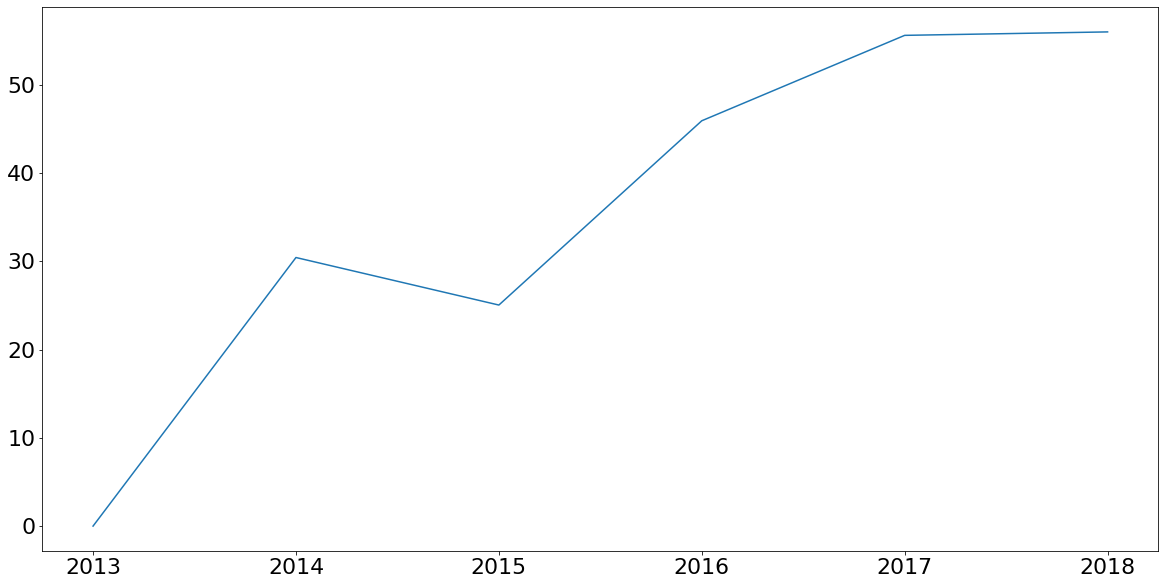

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(trainf.groupby(["ANIO"])[['CLASE']].mean()*100)

### Target Leakage

#### Sales_Contract_No
La variable `Sales_Contract_No` representa un claro ejemplo de **Target Leakage**.

En un primer análisis exploratorio de datos, surgió la increíble capacidad predictiva que generaba la variable `Sales_Contract_No`, no fue necesario profundizar mucho más para entender que se trataba de un falso predictor, ya que **esta variable de forma aislada generaba un accuracy del 94%**, sin necesidad de aplicar ningún modelo.

A los fines de la competencia, ya que el 50% de la nota dependía del score final, utilice esta variable para el modelo, pero **no tiene ningún sentido en un modelo real de negocio**. 

Esto se debe a que aquellas oportunidades que tenían algún valor (distinto de None) en esta variable, tenían una probabilidad del 94% de tener éxito, lo que de forma intuitiva se puede interpretar como que **en realidad la oportunidad ya era exitosa**, por eso se firmó el contrato de venta y por eso tiene un número asignado de contrato.

Si se utilizan este tipo de variables, el modelo se basa en ellas para realizar la predicción, pero ante nuevas observaciones donde no se tiene este dato, **el poder predictivo real cae de forma exponencial**.

Como ejemplo, voy a crear una variable flag que indica si se firmó o no el contrato y veremos **la curva ROC** de dicha variable y la **AUC** generada.

In [ ]:
train['con_sales_contract'] = train.apply(lambda x: 0 if x['Sales_Contract_No'] is None or 'None' in x['Sales_Contract_No']  else 1, axis=1)
apply['con_sales_contract'] = apply.apply(lambda x: 0 if x['Sales_Contract_No'] is None or 'None' in x['Sales_Contract_No']  else 1, axis=1)

train.groupby(['con_sales_contract','CLASE']).count()

Opportunity_ID  ...  Planned_Delivery_End_Date_m
con_sales_contract CLASE                  ...                             
0                  0                4474  ...                         4448
                   1                 101  ...                          101
1                  0                 295  ...                          294
                   1                4971  ...                         4941

[4 rows x 54 columns]

Con la primer tabla de contigencia ( o tabla cruzada ) comparando la nueva variable generada ( `con_sales_contract` ) y el target de predicción, podemos ver que **el 98% de las oportunidades que fueron exitosas tenían contrato firmado** y que **el 94% de las oportunidades con contrato firmado fueron exitosas**, desde ambos puntos de vista se comprueba la relación. 
<br>

Graficamos la **curva ROC** utilizando solo la variable `con_sales_contract` para ordernar las oportunidades de mayor a menor probabilidad de éxito, sin generar ningún modelo.

AUC - Área Bajo la Curva: 0.9591144594790355


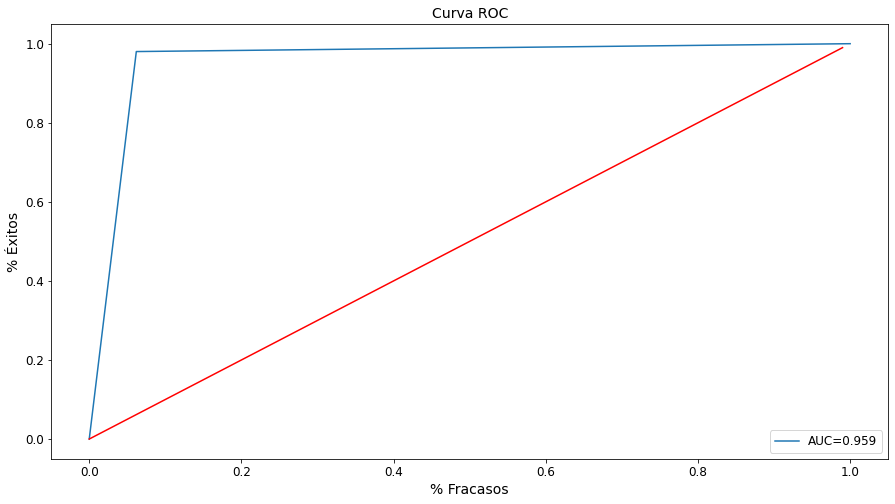

In [ ]:
plt.figure(figsize=(15, 8))

fpr, tpr, _ = metrics.roc_curve(train['CLASE'],  train['con_sales_contract'])
auc = metrics.roc_auc_score(train['CLASE'], train['con_sales_contract'])
print("AUC - Área Bajo la Curva: {}".format(auc))

# Graficamos la curva roc del arbol
plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
plt.xlabel('% Fracasos', fontsize=14)
plt.ylabel('% Éxitos', fontsize=14)
plt.legend(loc=4, fontsize=12)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR, AUC=0.5",color="red")

plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

A primera vista, con la **pendiente casi vertical de la curva ROC** podemos ver como solo esta variable generaría una enorme capacidad predictiva, la cual es irreal en terminos reales de aplicación.

#### Posible Leakage general
Existen algunas otras variables, donde la relación no es tan directa como con el número de contrato, pero que intuyo **pueden estar embebiendo, de forma no intencional, información del futuro**, esto se debe principalmente a que el set de datos es una foto final de cada oportunidad.

Si tuviera que generar un modelo real de negocio, **generaría snapshots mensuales (a priori) con el estado de cada oportunidad al momento de la foto**, así evitar incluir información de acciones futuras con lo cual el modelo, cuando deba predecir una nueva observación, no va a contar.

Esto mismo aplica para la variable número de contrato, solo que en el caso particular de la competencia, el target leakage estaba presente también en los datos de validación, generando un score alto, incluso en la competencia.

Detallo alguna de las variables que considero requieren un análisis adicional con información de contexto.

#### Variable Month

La variable `Month` aumenta la capacidad predictiva del modelo, pero a priori no considero que deba utilizarse en un modelo real, ya que es solo una categorización de los meses de entrega, estimo que su poder predictivo está relacionado a que el modelo **memoriza** los meses donde hubo **mejor tasa de éxito en oportunidades** y, dado que el set de **validación comparte meses de entrega con el de entrenamiento**, esto le permite tener un buen poder predictivo, incluso en la competencia.

Esto es una inferencia, necesitaría mas información sobre como se generó el set de datos para poder decirlo a ciencia cierta.

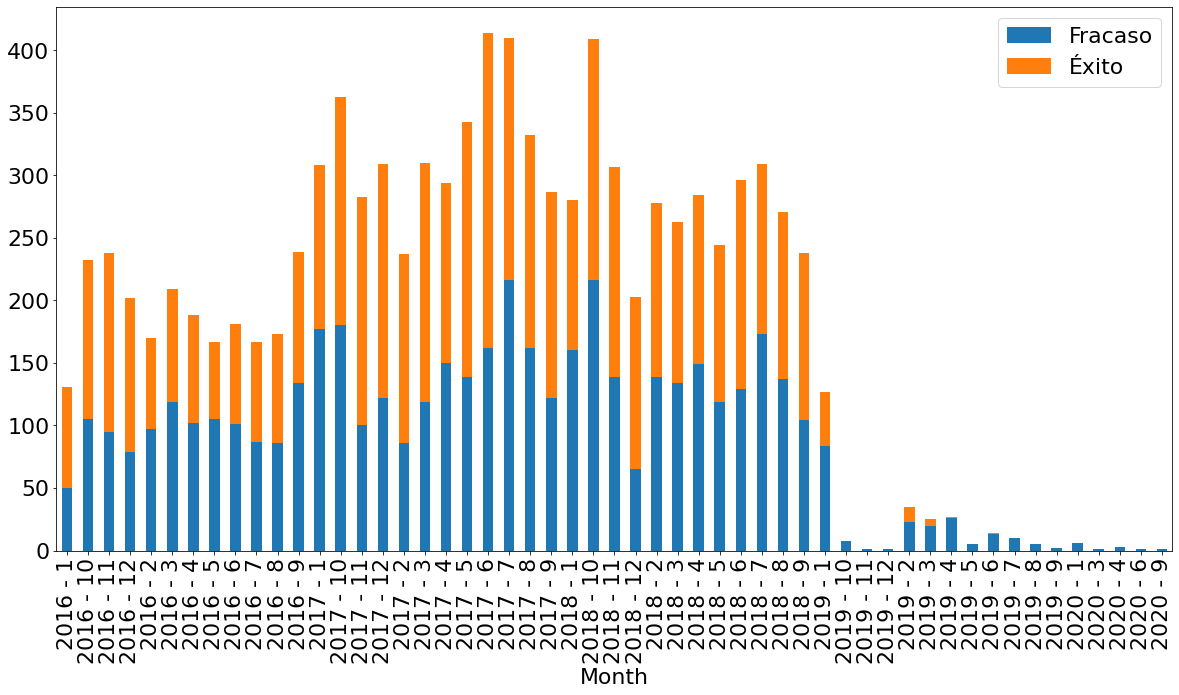

In [ ]:
# Vemos la tasa de conversión por cada mes/año de entrega
sub_df = train.groupby(["Month","CLASE"])[["Opportunity_ID"]].count().unstack()
sub_df.columns = ["Fracaso","Éxito"]
sub_df.plot(kind="bar",stacked=True, figsize=(20,10))

#### Variable Size
Al parecer las oportunidades que tienen asignado un `Size` son aquellas que sabemos no tuvieron éxito, entiendo que esto puede estar relacionado con el flujo que se lleva adelante desde que llega una oportunidad hasta que fue resuelta. 

De igual forma considero que esto requiere un análisis adicional, para entender porque TODAS las oportunidades con `Size` asignado no fueron exitosas.

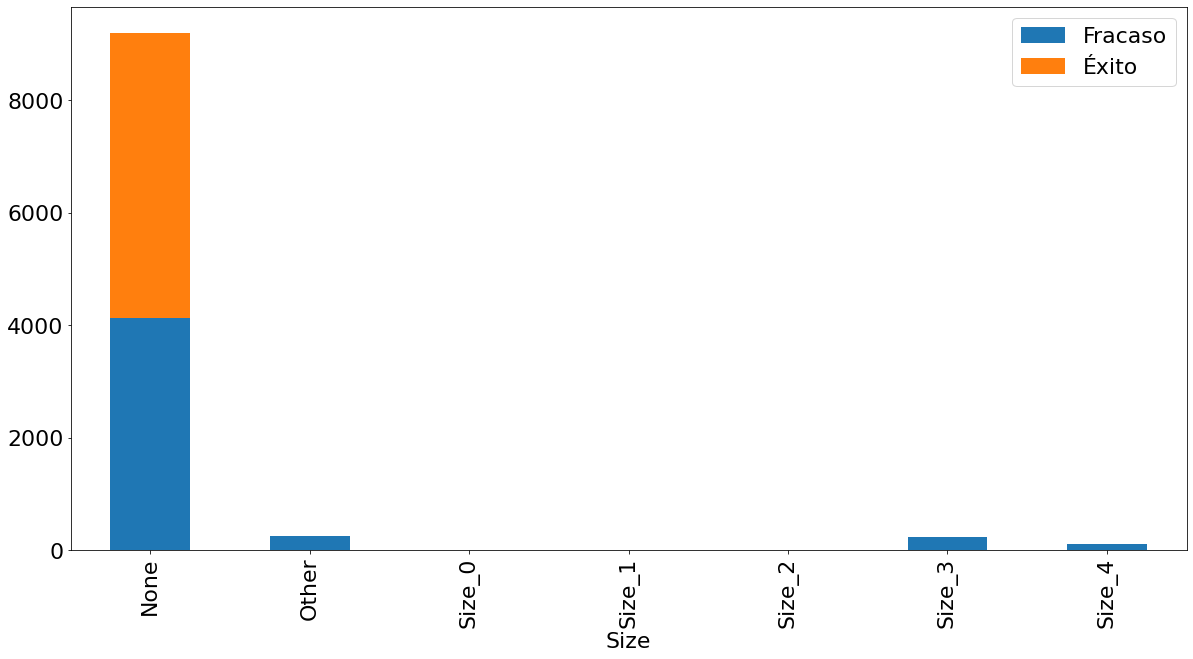

In [ ]:
# Vemos la tasa de conversión por cada categoría Size
sub_df = train.groupby(["Size","CLASE"])[["Opportunity_ID"]].count().unstack()
sub_df.columns = ["Fracaso","Éxito"]
sub_df.plot(kind="bar",stacked=True, figsize=(20,10))

In [ ]:
# Función custom para realizar un bining con un criterio propio
def ntile(x: pd.core.groupby.generic.SeriesGroupBy, bucket: int):
    def _ntile(x: pd.Series, bucket: int):
        n = x.shape[0]
        sub_n = n // bucket
        diff = n - (sub_n * bucket)

        result = []
        for i in range(bucket):
            sub_result = [i] * (sub_n + (1 if diff else 0))
            result.extend(sub_result)
            if diff > 0:
                diff -= 1
        return pd.Series(result, index=x.index)
    
    x = x.sort_values(ascending=False)
    result = []
    # partition
    if isinstance(x, pd.core.groupby.generic.SeriesGroupBy):
        for name, group in x:
            result.append(_ntile(group, bucket))
    elif isinstance(x, pd.core.groupby.generic.DataFrameGroupBy):
        for group_id, group in x:
            result.append(_ntile(group.iloc[:, 0], bucket))
    elif isinstance(x, pd.Series):
        result.append(_ntile(x, bucket))
    elif isinstance(x, pd.DataFrame):
        result.append(_ntile(x.iloc[:, 0], bucket))
    else:
        raise TypeError('`x` should be `pandas.Series` or `pandas.DataFrame` or ''`pd.core.groupby.generic.SeriesGroupBy` or ''`pd.core.groupby.generic.DataFrameGroupBy`, ''not {}.'.format(type(x)))
    return pd.concat(result)

### Variables de alta dimensionalidad

Del análisis exploratorio, surgió que las variables `Territory` y `Account Owner` tenían **peso al momento de predecir el éxito** o nó de una oportunidad comercial.

Las mismas, tenía una alta dimensionalidad (muchos valores posibles) y esto lleva a que los modelos aprendan patrones muy específicos (sobre ajustados).

En base a esto, decidí crear agrupaciones propias para ambas variables, en **función de la tasa de éxito histórica**, permitiendo agrupar *las mejores y las peores categorías* por separado. Este proceso de transformación puede ser considerado dentro de las técnicas de **target embedding**.

Con esta agrupación, el modelo **puede aprender patrones más fuertes** y predecir mejor otras oportunidades.

Cabe resaltar que, dado que no tenía cortes temporales de los datos, no pude realizar el proceso de la forma ideal (considerando la tasa de éxito del pasado), así que tuve que tomar la tasa de éxito presente en el set de datos de entrenamiento.



#### Variable Territory

In [ ]:
trainf = copy.copy(train)
trainf["Territory_CLASE"] = trainf.groupby(["Territory"])['CLASE'].transform('mean')
trainf["Territory_CLASE"] = ntile(trainf["Territory_CLASE"], 5)
dfd = trainf.groupby(["Territory"])[["Territory_CLASE"]].max()
del trainf

print(train.shape)
train = train.merge(dfd, how='left', on='Territory')
apply = apply.merge(dfd, how='left', on='Territory')
print(train.shape)

train.head(5)

(9841, 56)
(9841, 57)


,Opportunity_ID,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Total_Amount_t,ASP_(converted)_t,Planned_Delivery_End_Date_m,CLASE,con_sales_contract,Territory_CLASE
0,0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5958264,EUR,5958264,Prod_Category_A_None,5958264,0.58817,2016-06-30,0,0,2
1,1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,54500,EUR,54500,Prod_Category_A_None,54500,0.59948,2016-01-20,1,1,2
2,2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83866,USD,83866,Prod_Category_A_None,83866,0.48000,2016-01-25,1,1,1
3,3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421882,USD,7421882,Prod_Category_A_None,7421882,0.53000,2018-03-31,0,0,1
4,4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192,USD,13357192,Prod_Category_A_None,13357192,0.53000,2018-02-28,0,0,1


Tasa de conversión histórica por grupo de territorio

In [ ]:
train.groupby(["Territory_CLASE"])[['CLASE']].mean()

,CLASE
Territory_CLASE,
0,0.741299
1,0.616270
2,0.537496
3,0.437245
4,0.302559


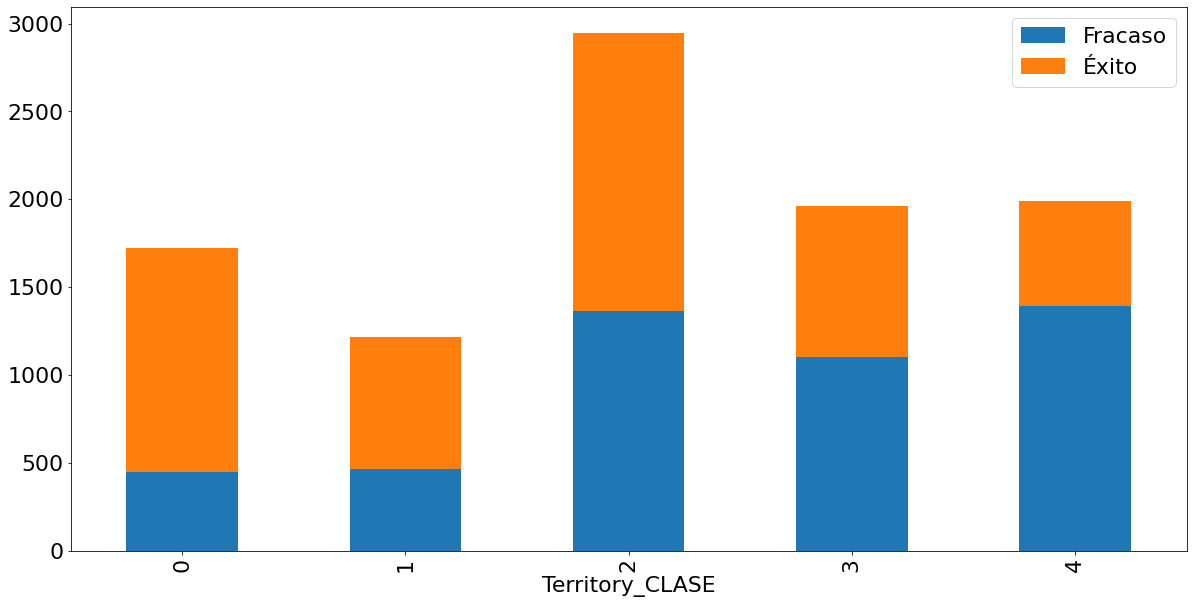

In [ ]:
# Vemos la tasa de conversión por cada categoría
sub_df = train.groupby(["Territory_CLASE","CLASE"])[["Opportunity_ID"]].count().unstack()
sub_df.columns = ["Fracaso","Éxito"]
sub_df.plot(kind="bar",stacked=True, figsize=(20,10))

En el gráfico se puede apreciar como la tasa de éxito varia de grupo a grupo de forma decreciente con el número de grupo.

Territorios del Mejor grupo

In [ ]:
train[train.Territory_CLASE==0].groupby(["Territory"])[['CLASE']].count().sort_values(by="CLASE", ascending=False).head(5)

,CLASE
Territory,
Japan,607
Australia,579
Singapore,293
Austria,72
China (PRC),52


Territorios del Peor grupo

In [ ]:
train[train.Territory_CLASE==4].groupby(["Territory"])[['CLASE']].count().sort_values(by="CLASE", ascending=False).head(10)

,CLASE
Territory,
NE America,518
France,393
SE America,340
Indonesia,141
SW America,104
Jordan,82
Philippines,81
Canada,61
Poland,44


#### Variable Account Owner

In [ ]:
trainf = copy.copy(train)
trainf["Account_Owner_CLASE"] = trainf.groupby(["Account_Owner"])['CLASE'].transform('mean')
trainf["Account_Owner_CLASE"] = ntile(trainf["Account_Owner_CLASE"], 5)
dfd = trainf.groupby(["Account_Owner"])[["Account_Owner_CLASE"]].max()
del trainf

print(train.shape)
train = train.merge(dfd, how='left', on='Account_Owner')
apply = apply.merge(dfd, how='left', on='Account_Owner')
print(train.shape)

train.head(5)

(9841, 57)
(9841, 58)


,Opportunity_ID,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Total_Amount_t,ASP_(converted)_t,Planned_Delivery_End_Date_m,CLASE,con_sales_contract,Territory_CLASE,Account_Owner_CLASE
0,0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5958264,EUR,5958264,Prod_Category_A_None,5958264,0.58817,2016-06-30,0,0,2,4
1,1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,54500,EUR,54500,Prod_Category_A_None,54500,0.59948,2016-01-20,1,1,2,4
2,2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83866,USD,83866,Prod_Category_A_None,83866,0.48000,2016-01-25,1,1,1,0
3,3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421882,USD,7421882,Prod_Category_A_None,7421882,0.53000,2018-03-31,0,0,1,2
4,4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192,USD,13357192,Prod_Category_A_None,13357192,0.53000,2018-02-28,0,0,1,2


Tasa de conversión histórica por grupo de Account Owner

In [ ]:
train.groupby(["Account_Owner_CLASE"])[['CLASE']].mean()

,CLASE
Account_Owner_CLASE,
0,0.725300
1,0.641423
2,0.568452
3,0.441564
4,0.265947


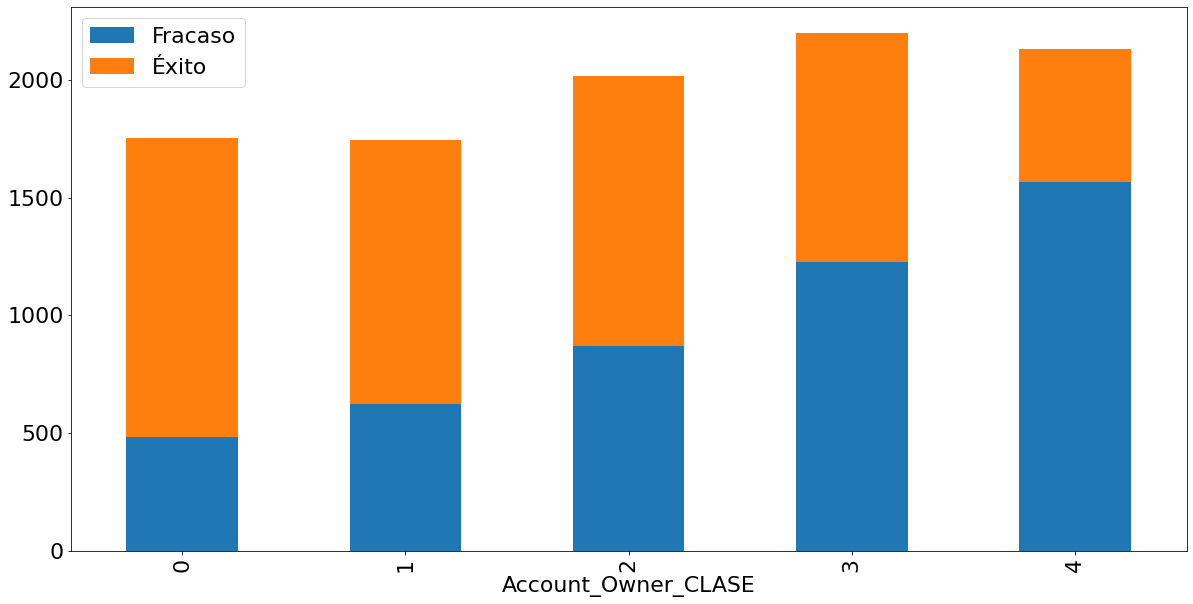

In [ ]:
# Vemos la tasa de conversión por cada categoría
sub_df = train.groupby(["Account_Owner_CLASE","CLASE"])[["Opportunity_ID"]].count().unstack()
sub_df.columns = ["Fracaso","Éxito"]
sub_df.plot(kind="bar",stacked=True, figsize=(20,10))

Principales Owners del mejor Grupo

In [ ]:
train[train.Account_Owner_CLASE==0].groupby(["Account_Owner"])[['CLASE']].count().sort_values(by="CLASE", ascending=False).head(5)

,CLASE
Account_Owner,
Person_Name_32,486
Person_Name_64,416
Person_Name_65,305
Person_Name_66,201
Person_Name_21,139


Principales Owners del peor Grupo

In [ ]:
train[train.Account_Owner_CLASE==4].groupby(["Account_Owner"])[['CLASE']].count().sort_values(by="CLASE", ascending=False).head(5)

,CLASE
Account_Owner,
Person_Name_3,627
Person_Name_16,390
Person_Name_45,239
Person_Name_38,221
Person_Name_60,209


### Necesidad de aprobación unificada
Para las variables `Pricing, Delivery_Terms_Approved` y `Pricing, Delivery_Terms_Quote_Appr` decidí crear una variable que utilice información de ambas, para diferenciar aquellas oportunidades que necesitaban aprobación y la obtuvieron o no, de las que directamente no la necesitaban.

Si bien, los algoritmos de clasificación son capaces de detectar estos patrones, me pareció de especial interés probar esta variable ya que a los fines de la competencia, la diferencia por puntajes en las primeras posicioens es mínima y toda información diferencial puede ser de utilidad.



In [ ]:
train['Delivery_Terms_Approval'] = train.apply(lambda x: 1 if x['Pricing, Delivery_Terms_Approved'] > 0 else 0 if x['Pricing, Delivery_Terms_Quote_Appr'] > 0 else 2, axis=1)
apply['Delivery_Terms_Approval'] = apply.apply(lambda x: 1 if x['Pricing, Delivery_Terms_Approved'] > 0 else 0 if x['Pricing, Delivery_Terms_Quote_Appr'] > 0 else 2, axis=1)

train.head(5)

,Opportunity_ID,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Total_Amount_t,ASP_(converted)_t,Planned_Delivery_End_Date_m,CLASE,con_sales_contract,Territory_CLASE,Account_Owner_CLASE,Delivery_Terms_Approval
0,0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5958264,EUR,5958264,Prod_Category_A_None,5958264,0.58817,2016-06-30,0,0,2,4,1
1,1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,54500,EUR,54500,Prod_Category_A_None,54500,0.59948,2016-01-20,1,1,2,4,2
2,2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83866,USD,83866,Prod_Category_A_None,83866,0.48000,2016-01-25,1,1,1,0,2
3,3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421882,USD,7421882,Prod_Category_A_None,7421882,0.53000,2018-03-31,0,0,1,2,0
4,4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192,USD,13357192,Prod_Category_A_None,13357192,0.53000,2018-02-28,0,0,1,2,0


### Variables categóricas
Para el resto de variables categóricas, realizo la conversión con un LabelEncoder para poder utilizarlas en el modelo a aplicar LGBM.

Sinceramente no es algo que me guste hacer así, pero no dispongo de más tiempo para bajar en detalle de análisis para cada variable, en un modelo serio debería analizar cada variable y entender su importancia para el modelo.

**A los fines de la competencia, deje toda variable que sumara poder predictivo en el modelo, pero en muchos casos esto puede ser overfitting**.

In [ ]:
# Leemos el encoder ya entrenado
les = pickle.load(open(BASE_PATH+"label.encoder", 'rb')) 

cols_modified = []
# Creamos un gráfico boxplot para analizar las variables
for c in train.columns:
  if("CLASE" not in c and ("str"  in str(train.dtypes[c]) or "object" in str(train.dtypes[c]))):
    train[c] = train[c].fillna('Null')
    apply[c] = apply[c].fillna('Null')
    cols_modified.append({'col':c, 'cant':len(list(train[c].value_counts()))})
    
    # Tomo el encoder de la variable asignada
    le = copy.copy(les[c])

    # Transformo training
    train[c] = le.transform(train[c].astype(str))
    dic = dict(zip(le.classes_, le.transform(le.classes_)))

    # Transformo testing
    try:
      apply[c] = apply[c].astype(str).map(dic).fillna(-1).astype(int) 
    except Exception as e:
      print(e)

train['ifnullSales_Contract_No'] = train.apply(lambda x: 1 if x['Sales_Contract_No']>= 1120 and x['Sales_Contract_No'] < 4100 else 0, axis=1)
apply['ifnullSales_Contract_No'] = apply.apply(lambda x: 1 if x['Sales_Contract_No']>= 1120 and x['Sales_Contract_No'] < 4100 else 0, axis=1)

print("Columnas modificadas: "+str(cols_modified))
train.head(5)

Columnas modificadas: [{'col': 'Region', 'cant': 5}, {'col': 'Territory', 'cant': 76}, {'col': 'Bureaucratic_Code', 'cant': 7}, {'col': 'Source ', 'cant': 14}, {'col': 'Billing_Country', 'cant': 80}, {'col': 'Account_Name', 'cant': 1635}, {'col': 'Opportunity_Name', 'cant': 9841}, {'col': 'Sales_Contract_No', 'cant': 5267}, {'col': 'Account_Owner', 'cant': 48}, {'col': 'Opportunity_Owner', 'cant': 53}, {'col': 'Account_Type', 'cant': 7}, {'col': 'Opportunity_Type', 'cant': 25}, {'col': 'Quote_Type', 'cant': 2}, {'col': 'Delivery_Terms', 'cant': 9}, {'col': 'Brand', 'cant': 26}, {'col': 'Product_Type', 'cant': 7}, {'col': 'Size', 'cant': 7}, {'col': 'Product_Category_B', 'cant': 28}, {'col': 'Price', 'cant': 53}, {'col': 'Currency', 'cant': 3}, {'col': 'Last_Modified_By', 'cant': 55}, {'col': 'Product_Family', 'cant': 183}, {'col': 'Product_Name', 'cant': 395}, {'col': 'ASP_Currency', 'cant': 5}, {'col': 'ASP_(converted)_Currency', 'cant': 1}, {'col': 'Month', 'cant': 53}, {'col': 'Deli

,Opportunity_ID,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Total_Amount_t,ASP_(converted)_t,Planned_Delivery_End_Date_m,CLASE,con_sales_contract,Territory_CLASE,Account_Owner_CLASE,Delivery_Terms_Approval,ifnullSales_Contract_No
0,0,27761,2,47,1,1,1,1,0,4,2015-06-16,0,52,1306,2179,5266,33,7,2,1,1,2,2015-12-07,24,0,0,0,51,1,NaT,2016-01-30,2016-06-13,7,161,394,1,0.52,0,0.58817,2016-05-01,2016-06-30,7,1,2016,NaT,10,1,5958264,1,5958264,0,5958264,0.58817,2016-06-30,0,0,2,4,1,0
1,1,27760,2,47,0,0,0,0,0,4,2015-06-16,0,52,1306,2182,3100,33,10,2,1,1,2,2015-12-07,24,0,0,0,51,1,NaT,2016-01-20,2016-01-15,10,161,3,1,0.53,0,0.59948,2016-01-18,2016-01-20,0,0,2016,NaT,0,1,54500,1,54500,0,54500,0.59948,2016-01-20,1,1,2,4,2,1
2,2,27446,1,44,0,0,0,0,0,4,2015-04-21,12,78,702,5334,5008,43,52,4,1,1,4,2015-12-08,24,0,0,0,51,1,NaT,2016-09-30,2016-09-29,54,165,387,4,0.48,0,0.48000,2016-01-25,2016-01-25,0,0,2016,NaT,0,4,83866,4,83866,0,83866,0.48000,2016-01-25,1,1,1,0,2,0
3,3,16808,1,44,1,0,1,0,0,5,2013-07-27,4,78,182,4901,5266,46,52,4,11,1,1,2015-12-08,25,2,6,10,39,2,NaT,NaT,2018-03-27,54,94,300,4,0.53,0,0.53000,2018-02-01,2018-03-31,28,0,2018,NaT,14,4,7421882,4,7421882,0,7421882,0.53000,2018-03-31,0,0,1,2,0,0
4,4,16805,1,44,1,0,1,0,0,5,2013-07-27,4,78,182,8576,5266,46,52,4,11,1,1,2015-12-08,25,2,6,10,39,2,NaT,2017-06-02,2018-03-27,54,94,300,4,0.53,0,0.53000,2018-02-01,2018-02-28,28,0,2018,NaT,25,4,13357192,4,13357192,0,13357192,0.53000,2018-02-28,0,0,1,2,0,0


### Variables Fechas
Las variables de tipo fecha NO se utilizan tal cual se encuentran en el set de datos original.

Las mismas se utilizaron para crear variables relativas a la fecha de alta de la oportunidad, esto bajo la premisa que la probabilidad de éxito podría depender del tiempo disponible para entrega así como de la antigüedad de la cuenta bajo la cual se generó la oportunidad.

Si **existieran fotos mensuales** (o snapshots) de este set de datos, se podrían construir variables relativas más interesantes sobre la **interacción o el cambio de estado de una oportunidad de un mes al otro**, esto permitiría entender si la oportunidad sigue activa o fue frenada. 

Las variables creadas, fueron:

- `tiempo_crear_cuenta`: Representa la antiguedad de la cuenta para la cual se genera la opotunidad, se calcula como la cantidad de días entre la creación de la cuenta y la creación de la oportunidad.

- `tiempo_entrega`: Representa el tiempo disponible hasta la entrega y se calcula como la cantidad de días entre la fecha de creación de la oportunidad y la mayor fecha de entrega pactada del pedido (del último producto).

- `tiempo_entrega_m`: Representa el mínimo tiempo disponible hasta la entrega y se calcula como la cantidad de días entre la fecha de creación de la oportunidad y la menor fecha de entrega pactada del pedido (del producto que se entregue primero dentro de la oportunidad).

- `tiempo_hasta_ult_modif`: Representa el tiempo sucedido hasta la última modificación, y se calcula como la cantidad de días entre la fecha de última modificación y la fecha de creación de la oportunidad, para entender si la oportunidad está siendo gestionada o está frenada.

In [ ]:
#Variables relativas entre ellas
train['tiempo_crear_cuenta']      = train.apply(lambda x: ( x["Account_Created_Date"]       - x["Opportunity_Created_Date"] ).days, axis=1)
train['tiempo_entrega']           = train.apply(lambda x: ( x["Planned_Delivery_End_Date"]  - x["Opportunity_Created_Date"] ).days, axis=1)
train['tiempo_entrega_m']         = train.apply(lambda x: ( x["Planned_Delivery_End_Date_m"]- x["Opportunity_Created_Date"] ).days, axis=1)
train['tiempo_hasta_ult_modif']   = train.apply(lambda x: ( x["Last_Modified_Date"]         - x["Opportunity_Created_Date"] ).days, axis=1)

apply['tiempo_crear_cuenta']      = apply.apply(lambda x: ( x["Account_Created_Date"]       - x["Opportunity_Created_Date"] ).days, axis=1)
apply['tiempo_entrega']           = apply.apply(lambda x: ( x["Planned_Delivery_End_Date"]  - x["Opportunity_Created_Date"] ).days, axis=1)
apply['tiempo_entrega_m']         = apply.apply(lambda x: ( x["Planned_Delivery_End_Date_m"]- x["Opportunity_Created_Date"] ).days, axis=1)
apply['tiempo_hasta_ult_modif']   = apply.apply(lambda x: ( x["Last_Modified_Date"]         - x["Opportunity_Created_Date"] ).days, axis=1)

train.head(5)

,Opportunity_ID,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Total_Amount_t,ASP_(converted)_t,Planned_Delivery_End_Date_m,CLASE,con_sales_contract,Territory_CLASE,Account_Owner_CLASE,Delivery_Terms_Approval,ifnullSales_Contract_No,tiempo_crear_cuenta,tiempo_entrega,tiempo_entrega_m,tiempo_hasta_ult_modif
0,0,27761,2,47,1,1,1,1,0,4,2015-06-16,0,52,1306,2179,5266,33,7,2,1,1,2,2015-12-07,24,0,0,0,51,1,NaT,2016-01-30,2016-06-13,7,161,394,1,0.52,0,0.58817,2016-05-01,2016-06-30,7,1,2016,NaT,10,1,5958264,1,5958264,0,5958264,0.58817,2016-06-30,0,0,2,4,1,0,-174,206.0,206.0,189
1,1,27760,2,47,0,0,0,0,0,4,2015-06-16,0,52,1306,2182,3100,33,10,2,1,1,2,2015-12-07,24,0,0,0,51,1,NaT,2016-01-20,2016-01-15,10,161,3,1,0.53,0,0.59948,2016-01-18,2016-01-20,0,0,2016,NaT,0,1,54500,1,54500,0,54500,0.59948,2016-01-20,1,1,2,4,2,1,-174,44.0,44.0,39
2,2,27446,1,44,0,0,0,0,0,4,2015-04-21,12,78,702,5334,5008,43,52,4,1,1,4,2015-12-08,24,0,0,0,51,1,NaT,2016-09-30,2016-09-29,54,165,387,4,0.48,0,0.48000,2016-01-25,2016-01-25,0,0,2016,NaT,0,4,83866,4,83866,0,83866,0.48000,2016-01-25,1,1,1,0,2,0,-231,48.0,48.0,296
3,3,16808,1,44,1,0,1,0,0,5,2013-07-27,4,78,182,4901,5266,46,52,4,11,1,1,2015-12-08,25,2,6,10,39,2,NaT,NaT,2018-03-27,54,94,300,4,0.53,0,0.53000,2018-02-01,2018-03-31,28,0,2018,NaT,14,4,7421882,4,7421882,0,7421882,0.53000,2018-03-31,0,0,1,2,0,0,-864,844.0,844.0,840
4,4,16805,1,44,1,0,1,0,0,5,2013-07-27,4,78,182,8576,5266,46,52,4,11,1,1,2015-12-08,25,2,6,10,39,2,NaT,2017-06-02,2018-03-27,54,94,300,4,0.53,0,0.53000,2018-02-01,2018-02-28,28,0,2018,NaT,25,4,13357192,4,13357192,0,13357192,0.53000,2018-02-28,0,0,1,2,0,0,-864,813.0,813.0,840


### Análisis de correlación Numérica
Antes de construir un modelo, de forma iterativa con cada nueva iteración fuí comparando la correlación numérica de las variables disponibles con la variable target.

Esto me fué de gran ayuda para enteder sobre que variables profundizar el análisis, tanto a nivel limpieza de datos como a nivel de construcción de nuevas variables (**Feature Engineering**).

In [ ]:
train.corr()[["CLASE"]].sort_values(by="CLASE", ascending=False)


,CLASE
CLASE,1.000000
con_sales_contract,0.920064
ifnullSales_Contract_No,0.535948
Delivery_Terms_Approval,0.233613
Price,0.152177
ASP,0.127544
Brand,0.120158
Delivery_Terms,0.118103
"Pricing, Delivery_Terms_Approved",0.112247
Opportunity_Type,0.102143


### Análisis por agrupado o binning
Para entender la relación de las variables, también agrupo sus valores en quintiles/deciles/ventiles/etc. en función de la variable en cuestión y analizo como se distribuye la tasa de éxito de las oportunidades dentro de esos grupos para entender que tan fuerte es la correlación encontrada.

#### Antiguedad de la cuenta

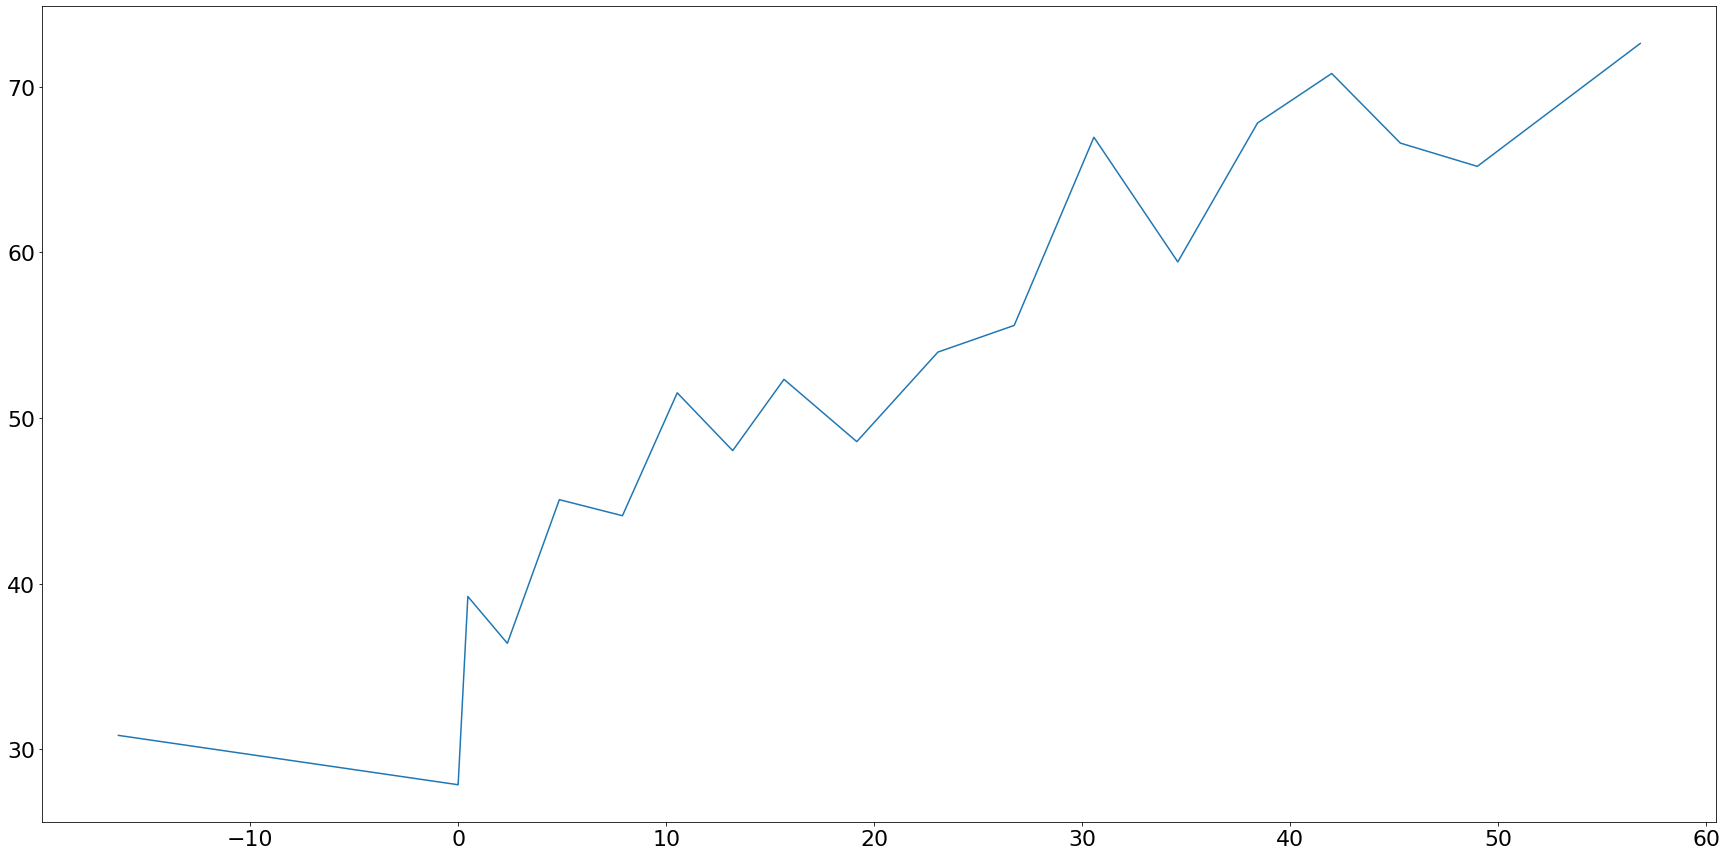

In [ ]:
trainf = copy.copy(train)
trainf["tiempo_crear_cuenta"] = (trainf["tiempo_crear_cuenta"]/30)
trainf["CLASE_MEAN"] = trainf.groupby(["tiempo_crear_cuenta"])['CLASE'].transform('mean')*100
trainf["tiempo_crear_cuenta_CLASE"] = round(ntile(trainf["tiempo_crear_cuenta"], 20))
trainf["tiempo_crear_cuenta_CLASE"] = trainf.groupby(["tiempo_crear_cuenta_CLASE"])['tiempo_crear_cuenta'].transform('max')*-1
dfd = trainf.groupby(["tiempo_crear_cuenta_CLASE"])[["CLASE_MEAN"]].mean().reset_index()
dfd = dfd.sort_values(by="tiempo_crear_cuenta_CLASE")
plt.figure(figsize=(30,15))
plt.plot(dfd.tiempo_crear_cuenta_CLASE, dfd.CLASE_MEAN)

#### Tiempo para entrega

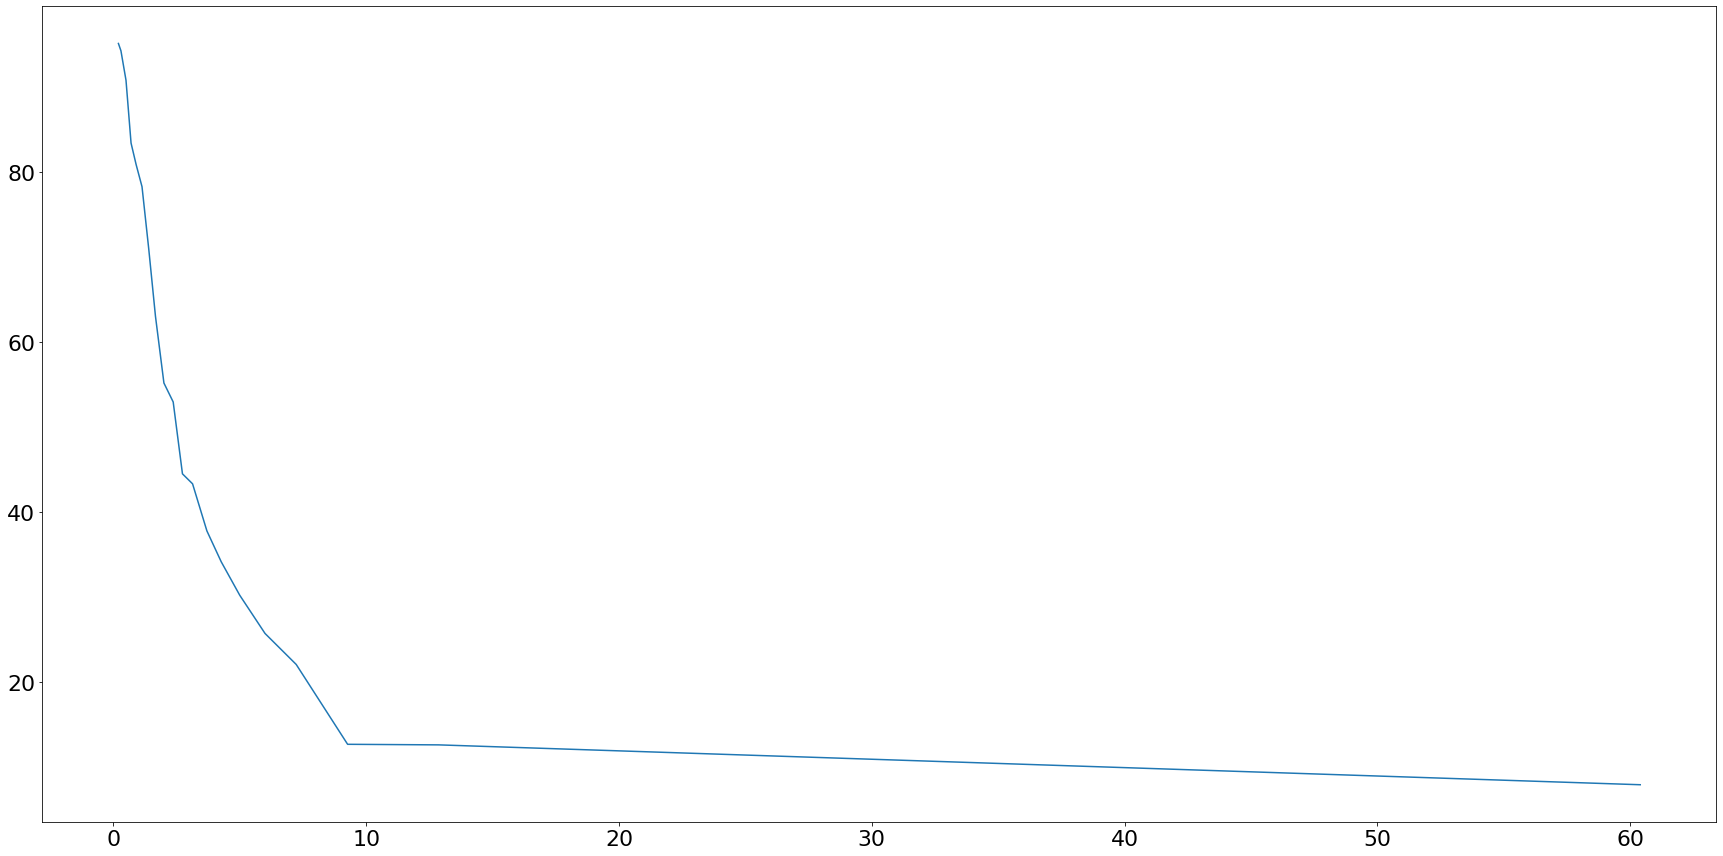

In [ ]:
trainf = copy.copy(train)
trainf["tiempo_entrega"] = (trainf["tiempo_entrega"]/30)
trainf["CLASE_MEAN"] = trainf.groupby(["tiempo_entrega"])['CLASE'].transform('mean')*100
trainf["tiempo_entrega_CLASE"] = round(ntile(trainf["tiempo_entrega"], 20))
trainf["tiempo_entrega_CLASE"] = trainf.groupby(["tiempo_entrega_CLASE"])['tiempo_entrega'].transform('max')
dfd = trainf.groupby(["tiempo_entrega_CLASE"])[["CLASE_MEAN"]].mean().reset_index()
dfd = dfd.sort_values(by="tiempo_entrega_CLASE")
plt.figure(figsize=(30,15))
plt.plot(dfd.tiempo_entrega_CLASE, dfd.CLASE_MEAN)

#### Fecha de ultima modificación

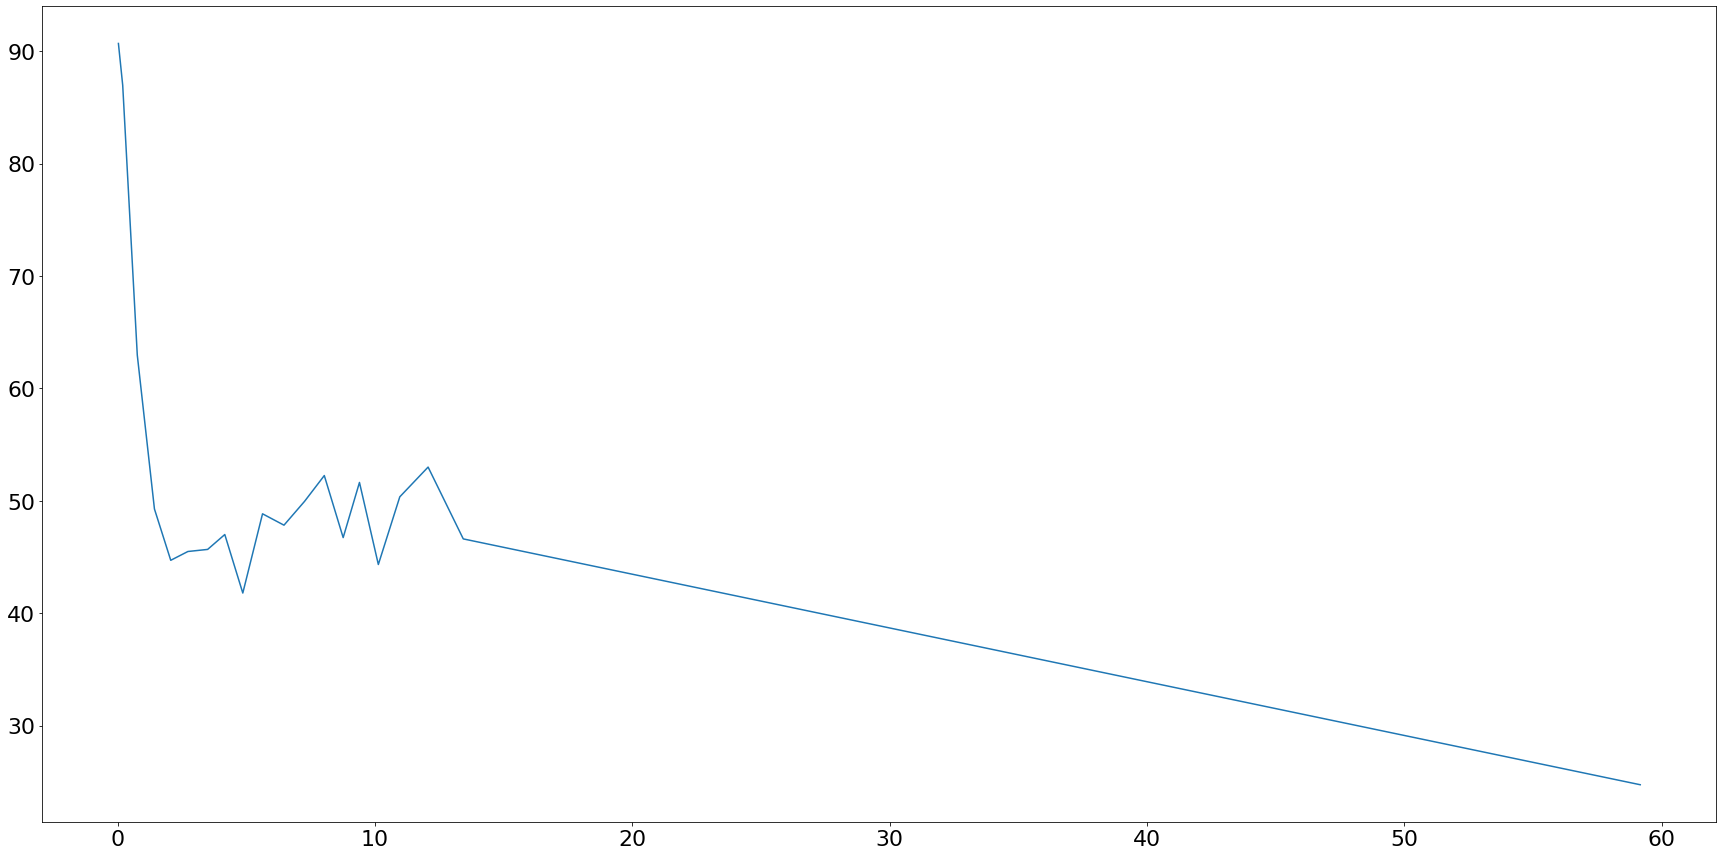

In [ ]:
trainf = copy.copy(train)
trainf["tiempo_hasta_ult_modif"] = (trainf["tiempo_hasta_ult_modif"]/30)
trainf["CLASE_MEAN"] = trainf.groupby(["tiempo_hasta_ult_modif"])['CLASE'].transform('mean')*100
trainf["tiempo_hasta_ult_modif_CLASE"] = round(ntile(trainf["tiempo_hasta_ult_modif"], 20))
trainf["tiempo_hasta_ult_modif_CLASE"] = trainf.groupby(["tiempo_hasta_ult_modif_CLASE"])['tiempo_hasta_ult_modif'].transform('max')
dfd = trainf.groupby(["tiempo_hasta_ult_modif_CLASE"])[["CLASE_MEAN"]].mean().reset_index()
dfd = dfd.sort_values(by="tiempo_hasta_ult_modif_CLASE")
plt.figure(figsize=(30,15))
plt.plot(dfd.tiempo_hasta_ult_modif_CLASE, dfd.CLASE_MEAN)

## Variables no utilizadas
En este punto quito del set de datos las variables no utilizadas, en general se trata de las variables fecha, las cuales se usaron para crear otras variables comparativas y variables con gran % de nulos o que generaban overfitting en el modelo.

Las variables no utilizadas como tales, fueron:

```
Product_Type
Last_Activity
Planned_Delivery_End_Date_m
Planned_Delivery_End_Date
Actual_Delivery_Date
Quote_Expiry_Date
Opportunity_Created_Date
Planned_Delivery_Start_Date
Account_Created_Date
Last_Modified_Date
```



In [ ]:
train2 = copy.copy(train)
train2.drop(["Product_Type","Last_Activity","Planned_Delivery_End_Date_m","Planned_Delivery_End_Date","Actual_Delivery_Date","Quote_Expiry_Date","Opportunity_Created_Date","Planned_Delivery_Start_Date","Account_Created_Date","Last_Modified_Date"], axis=1, inplace=True)

apply2 = copy.copy(apply)
apply2.drop(["Product_Type","Last_Activity","Planned_Delivery_End_Date_m","Planned_Delivery_End_Date","Actual_Delivery_Date","Quote_Expiry_Date","Opportunity_Created_Date","Planned_Delivery_Start_Date","Account_Created_Date","Last_Modified_Date"], axis=1, inplace=True)

print(train2.shape)
train2.head(5)

(9841, 54)


,Opportunity_ID,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Source,Billing_Country,Account_Name,Opportunity_Name,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Brand,Size,Product_Category_B,Price,Currency,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Total_Amount_t,ASP_(converted)_t,CLASE,con_sales_contract,Territory_CLASE,Account_Owner_CLASE,Delivery_Terms_Approval,ifnullSales_Contract_No,tiempo_crear_cuenta,tiempo_entrega,tiempo_entrega_m,tiempo_hasta_ult_modif
0,0,27761,2,47,1,1,1,1,0,4,0,52,1306,2179,5266,33,7,2,1,1,2,24,0,0,51,1,7,161,394,1,0.52,0,0.58817,7,1,2016,10,1,5958264,1,5958264,0,5958264,0.58817,0,0,2,4,1,0,-174,206.0,206.0,189
1,1,27760,2,47,0,0,0,0,0,4,0,52,1306,2182,3100,33,10,2,1,1,2,24,0,0,51,1,10,161,3,1,0.53,0,0.59948,0,0,2016,0,1,54500,1,54500,0,54500,0.59948,1,1,2,4,2,1,-174,44.0,44.0,39
2,2,27446,1,44,0,0,0,0,0,4,12,78,702,5334,5008,43,52,4,1,1,4,24,0,0,51,1,54,165,387,4,0.48,0,0.48000,0,0,2016,0,4,83866,4,83866,0,83866,0.48000,1,1,1,0,2,0,-231,48.0,48.0,296
3,3,16808,1,44,1,0,1,0,0,5,4,78,182,4901,5266,46,52,4,11,1,1,25,6,10,39,2,54,94,300,4,0.53,0,0.53000,28,0,2018,14,4,7421882,4,7421882,0,7421882,0.53000,0,0,1,2,0,0,-864,844.0,844.0,840
4,4,16805,1,44,1,0,1,0,0,5,4,78,182,8576,5266,46,52,4,11,1,1,25,6,10,39,2,54,94,300,4,0.53,0,0.53000,28,0,2018,25,4,13357192,4,13357192,0,13357192,0.53000,0,0,1,2,0,0,-864,813.0,813.0,840


## Conjunto de Testing
Para tener una métrica propia de validación del modelo, tomo del set de datos de entrenamiento una muestra estratificada del 20% para validar el modelo entrenado.

In [ ]:
# Ordeno por ID training
train2 = train2.reset_index().drop(["index"], axis=1).set_index(["ID"])
apply2 = apply2.reset_index().drop(["index"], axis=1).set_index(["ID"])

X_train, X_test, y_train, y_test = train_test_split(train2.drop(['CLASE'], axis=1),train2['CLASE'],test_size=0.2, random_state=42)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_apply = pd.get_dummies(apply2)

cols = set(X_train.columns).intersection(X_test.columns)
cols = cols.intersection(X_apply.columns)

X_test = X_test[cols].reset_index().set_index(["ID"])
X_train = X_train[cols].reset_index().set_index(["ID"])
X_apply = X_apply[cols].reset_index().set_index(["ID"])

print(X_train.shape)
X_train.head(5)

(7872, 52)


,Product_Category_B,Territory,tiempo_crear_cuenta,ASP_(converted)_Currency,Account_Type,ASP,"Pricing, Delivery_Terms_Quote_Appr",Account_Owner_CLASE,con_sales_contract,Prod_Category_A,Submitted_for_Approval,Region,Account_Owner,Account_Name,Territory_CLASE,Total_Amount_Currency,Size,Total_Taxable_Amount_Currency,Quote_Type,Opportunity_ID,Delivery_Quarter,Bureaucratic_Code_0_Approval,Opportunity_Type,Opportunity_Owner,Opportunity_Name,ASP_(converted),Month,Price,Total_Amount_t,Billing_Country,Bureaucratic_Code,tiempo_entrega_m,Delivery_Terms,Delivery_Year,Last_Modified_By,TRF,Total_Amount,Total_Taxable_Amount,ASP_(converted)_t,tiempo_hasta_ult_modif,Brand,Source,Product_Family,Delivery_Terms_Approval,Sales_Contract_No,Currency,ASP_Currency,ifnullSales_Contract_No,Bureaucratic_Code_0_Approved,"Pricing, Delivery_Terms_Approved",tiempo_entrega,Product_Name
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6409,0,47,-414,0,2,57.00,1,1,1,0,0,3,32,453,2,3,0,3,1,674,0,0,1,37,3401,0.51245,17,51,33905,36,4,22.0,4,2017,32,0,33905,33905,0.51245,366,24,0,161,1,455,1,3,0,0,1,22.0,3
7904,0,58,0,0,2,0.15,1,0,1,0,0,0,44,416,0,4,0,4,1,2008,2,1,1,50,9657,0.15000,9,51,148333,66,4,20.0,6,2016,8,0,4752,148331,5.40000,787,24,0,127,1,4026,1,4,1,1,1,20.0,214
9939,0,45,-36,0,0,0.42,0,3,1,0,0,2,6,1184,3,1,0,1,1,6925,0,0,22,7,4663,0.47506,24,51,99602,52,4,49.0,2,2018,32,0,49833,99602,0.93315,57,24,3,20,2,2822,1,1,1,0,0,49.0,78
28452,0,55,-862,0,1,0.00,1,2,0,0,0,1,46,1145,4,4,0,4,1,7653,2,0,11,52,4504,0.00000,23,51,29970,78,4,-37.0,5,2017,54,0,29970,29970,0.00000,9,24,12,121,1,5266,1,4,0,0,1,-37.0,178
5291,0,31,0,0,2,0.41,1,4,1,0,0,4,31,1554,4,4,0,4,1,5240,2,1,4,36,6051,0.41000,21,51,74910,37,4,28.0,1,2017,32,0,16912,74910,0.78000,234,24,12,14,1,1594,1,4,1,1,1,59.0,56


## Construcción del modelo
Una vez definidos los set de datos de entrenamiento y testing voy a construir un modelo aplicando el algoritmo de boosting de árboles de decisión `LGBMCLassifier`.

### Entrenamiento

Para el entrenamiento del modelo, voy a aplicar la técnica de `K-Fold Cross Validation`, utilizando 20 capas y el modelo final surge de realizar un `ensamble` promediando la probabilidad asignada por cada uno de los 20 modelos generados (uno por cada capa).

En cada modelo, dentro de la muestra definida (80%) el modelo se autoajusta aplicando la métrica de evaluación definida (Logistic Loss) y se limita el crecimiento de los árboles utilizando la funcionalidad de `early_stopping` de **LGBM** y definiendo una cantidad de estimadores lo suficientemente grande (`10000`).

Como resultado, se obtiene un modelo mucho más complejo pero con mejor capacidad predictiva, y menor overfitting, ya que compensa los errores de cada capa con las 19 capas restantes.

In [ ]:
fi = []
apply_probs = []
test_probs = []
train_probs2 = []
train_probs = []
s = 20191125

i = 0
for train_idx, valid_idx in model_selection.StratifiedKFold(n_splits=20, shuffle=True, random_state=s).split(X_train, y_train):
  i += 1

  # Split the train & validation datasets with the cv fold ids
  Xt = X_train.iloc[train_idx]
  Xt = Xt.reset_index().set_index(["ID"])
  yt = y_train.iloc[train_idx]

  Xv = X_train.iloc[valid_idx]
  Xv = Xv.reset_index().set_index(["ID"])
  yv = y_train.iloc[valid_idx]

  learner = LGBMClassifier(n_estimators=10000, random_state=s, objective="binary")
  learner.fit(Xt, yt, early_stopping_rounds=30, eval_set=[(Xt, yt), (Xv, yv)], verbose=0, eval_metric='logloss')  

  apply_probs.append(pd.Series(learner.predict_proba(X_apply)[:, -1],index=X_apply.index, name="fold_" + str(i)))
  test_probs.append(pd.Series(learner.predict_proba(X_test)[:, -1],index=X_test.index, name="fold_" + str(i)))
  train_probs2.append(pd.Series(learner.predict_proba(Xv)[:, -1], index=Xv.index, name="fold_" + str(i)))
  fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))

test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
apply_probs = pd.concat(apply_probs, axis=1).mean(axis=1)
train_probs2 = pd.concat(train_probs2)

fi = pd.concat(fi, axis=1).mean(axis=1)


### Importancia Variables
Vemos la importancia relativa de las variables, asignada por el algoritmo en función a los cortes realizados y como ayudaron dichas variables a diferenciar las oportunidades exitosas del resto.

In [ ]:
fi.sort_values(ascending=False).head(30).to_frame()

,0
tiempo_hasta_ult_modif,0.066455
tiempo_crear_cuenta,0.064924
Opportunity_ID,0.059852
Sales_Contract_No,0.053167
tiempo_entrega_m,0.050952
Account_Name,0.048918
ASP_(converted),0.046886
ASP_(converted)_t,0.044580
Month,0.044233
Opportunity_Name,0.043170


### Métrica de evaluación
La métrica de evaluación aplicada para la competencia fué Logistict Loss, en mi caso en particular analice la misma métrica dentro y fuera del set de datos de entrenamiento, la métrica *CV* refiere a la calculada por el set de validación dentro de la validación cruzada y la métrica en testing, refiere al 20% de datos separado y jamás utilizando para ningún tipo de entrenamiento/validación.

Esto me ayudó a entender que modelos tenían una cota de overfitting que no estaba del todo clara utilizando solo una métrica definitiva.

IMPORTANTE: A los fines de la competencia, utilice el modelo con mejor score pero **a sabiendas de que este modelo tiene un cierto grado de overfitting**, pero dado que el 50% de la nota dependía del score tomé esa decisión. En un **modelo real seleccionaría el modelo más estable** y donde tuviera menos dispersion de score tanto dentro del Cross Validation como en el set de datos de Testing.

In [ ]:
# Métrica de evaluación
print("CV SCORE: "+str(log_loss(y_train.sort_index(), train_probs2.sort_index())))

print("TEST SCORE: "+str(log_loss(y_test, test_probs)))

CV SCORE: 0.09380053368943654
TEST SCORE: 0.11864263350419528


### Ensamble Final
Para terminar calculo la probabilidad final asignada a cada oportunidad, en función de la probabilidad promedio calculada por los 20 modelos que se generaron dentro del proceso de validación cruzada.

In [ ]:
# Calculo la probabilidad mayor de cada oportunidad
apply_probs.name='PROB'
result = apply.reset_index().merge(apply_probs, on='ID').reset_index()[['Opportunity_ID','PROB']]
result.columns=['Opportunity_ID','PROB']
result.to_csv(BASE_PATH+"submission_prob.csv", sep=',', header=False, index=False)

print(result.shape)
result.head(5)

(1567, 2)


,Opportunity_ID,PROB
0,10689,0.994849
1,10690,0.989728
2,10691,0.970027
3,10692,0.900708
4,10693,0.992847


### Curva ROC

AUC - Area Under the Curve - Área Bajo la Curva: 0.9858206728497899


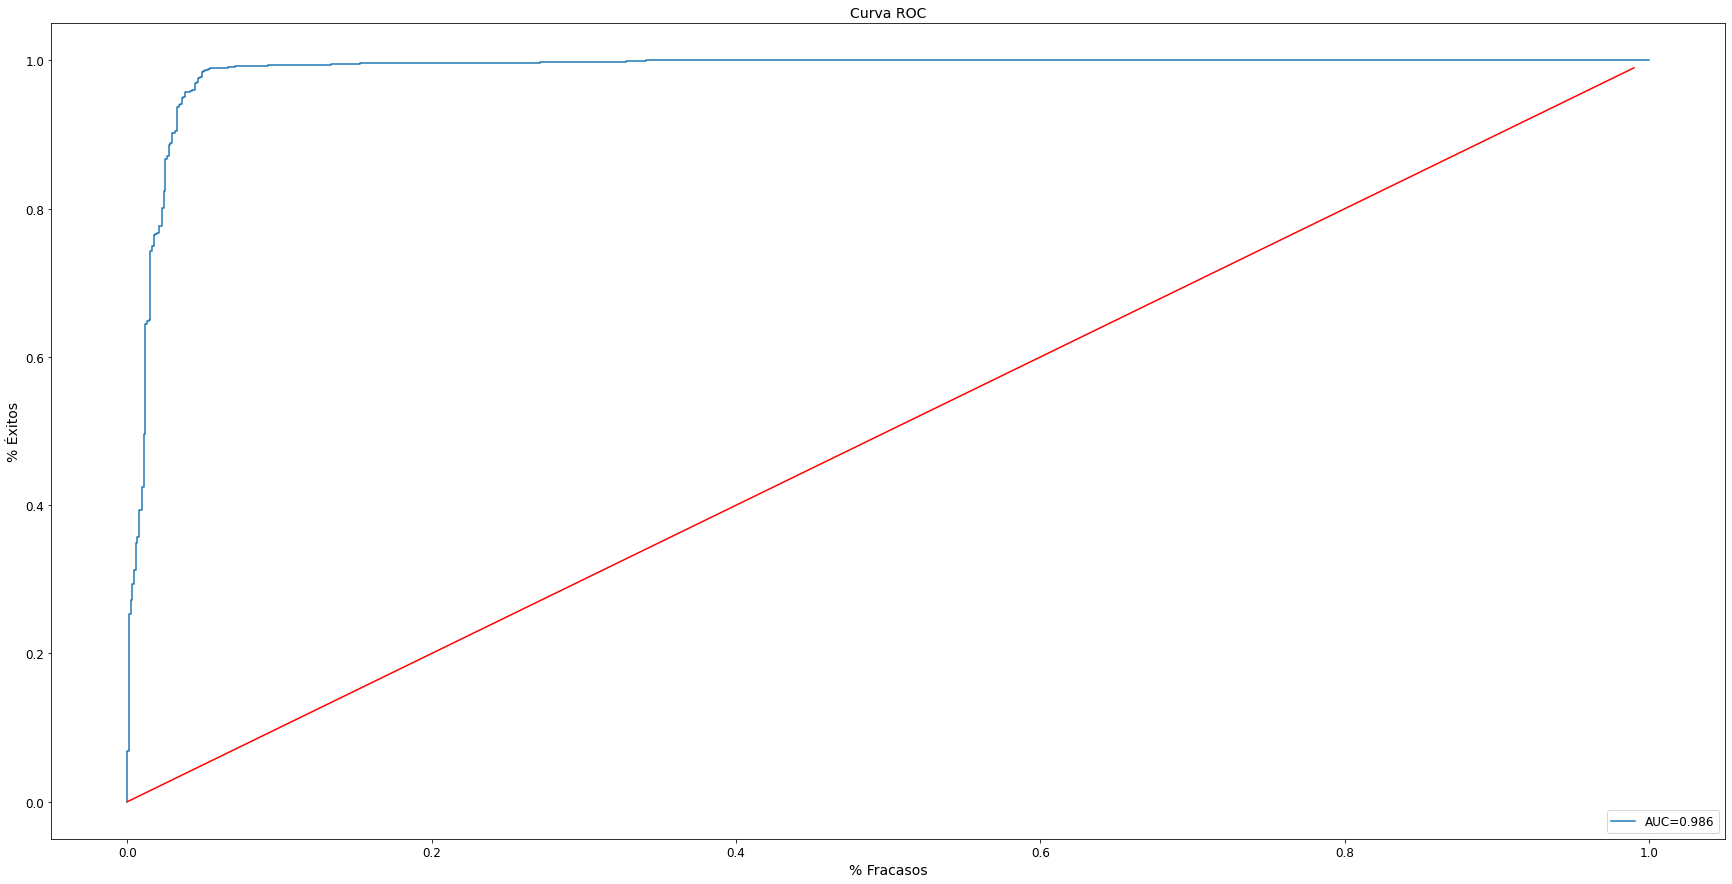

In [ ]:
plt.figure(figsize=(30,15))

y_pred_proba = test_probs
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC - Area Under the Curve - Área Bajo la Curva: {}".format(auc))

# Graficamos la curva roc del arbol
plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
plt.xlabel('% Fracasos', fontsize=14)
plt.ylabel('% Éxitos', fontsize=14)
plt.legend(loc=4, fontsize=12)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR, AUC=0.5",color="red")

plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

## Explicación del Modelo Propuesto
Dada la existencia del falso predictor **Sales_Contract_No**, la explicación del modelo estaría acotada, ya que se centra principalmente en dicha variable y no permite una mayor profundidad en las variables reales de interpretación, por esto voy a explicar un modelo omitiendo el uso de la misma.

### Interpretación Visual
Ya que el modelo propuesto pierde capacidad explicativa en post de ganar poder predictivo a travez del uso de Boosting de Árboles de Decisión y un ensemble de 20 capas, definí utilizar un modelo más simple que permita explicar el set de datos en función de la solución planteada, esto sería de cara a una presentación para ejecutivos del tipo C-Level.

Para esto utilizo el algoritmo `DecisionTreeClassifier` que representa un solo árbol y admite visualización del mismo, asi como las reglas generadas.

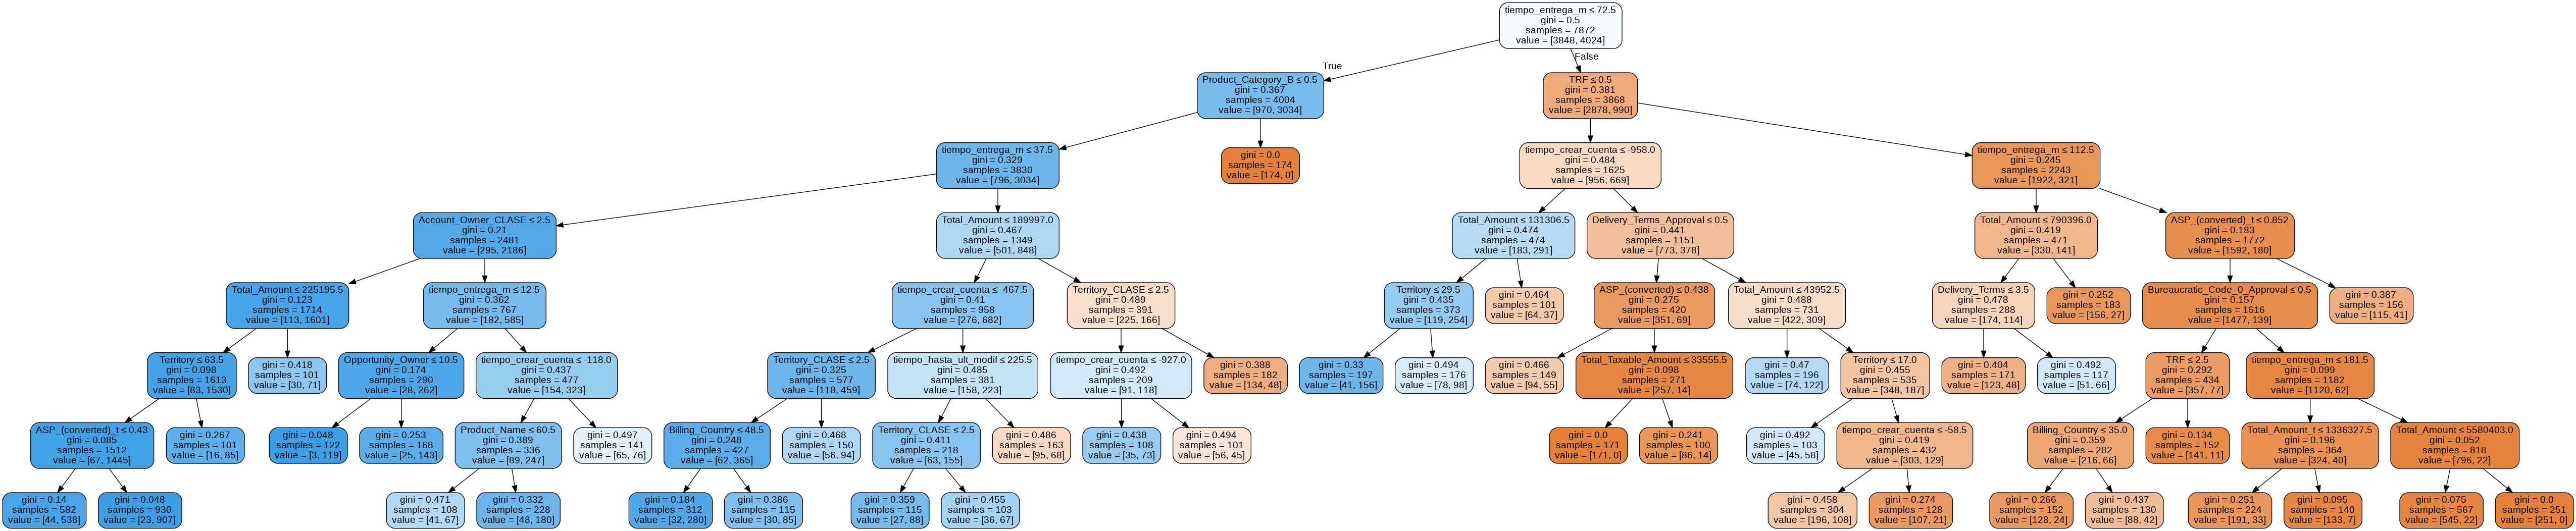

<Figure size 2160x1080 with 0 Axes>

In [ ]:
plt.figure(figsize=(30,15))

# Entrenamos un arbol pequeño (altura 5) que permita un análisis intuitivo
X_train_i = copy.copy(X_train)
X_train_i.drop(["Sales_Contract_No","con_sales_contract","ifnullSales_Contract_No"], axis=1, inplace=True)
X_train_i[X_train_i==np.inf]=np.nan
X_train_i.fillna(-1, inplace=True)
treeclf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=100, random_state=1)
treeclf.fit(X_train_i, y_train)

# Visualizamos el árbol generado usando graphviz
dot_data = export_graphviz(treeclf, out_file=None,  
                feature_names=X_train_i.columns,  # contiene los atributos predictores
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Curva ROC

AUC - Area Under the Curve - Área Bajo la Curva: 0.8781423278712982


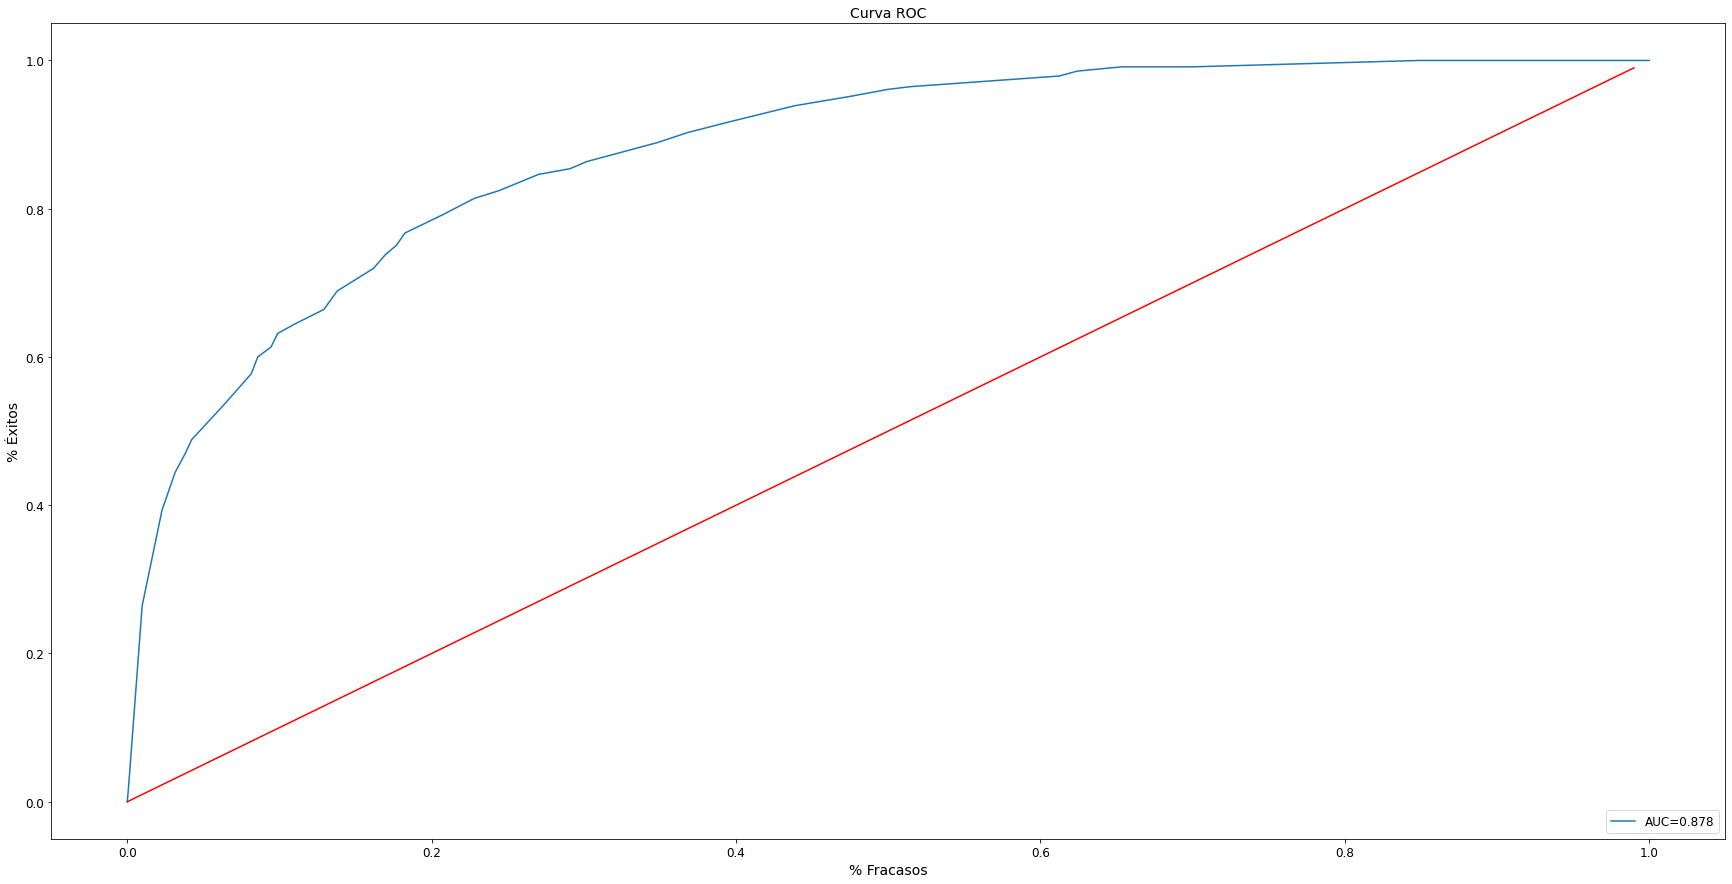

In [ ]:
plt.figure(figsize=(30,15))

X_test_i = copy.copy(X_test)
X_test_i.drop(["Sales_Contract_No","con_sales_contract","ifnullSales_Contract_No"], axis=1, inplace=True)
X_test_i[X_test_i==np.inf]=np.nan
X_test_i.fillna(-1, inplace=True)

y_pred_proba = treeclf.predict_proba(X_test_i)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC - Area Under the Curve - Área Bajo la Curva: {}".format(auc))

# Graficamos la curva roc del arbol
plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
plt.xlabel('% Fracasos', fontsize=14)
plt.ylabel('% Éxitos', fontsize=14)
plt.legend(loc=4, fontsize=12)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR, AUC=0.5",color="red")

plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

Podemos ver que, incluso sin la variables `Sales_contract_No` el modelo sigue teniendo alto poder predictivo, con un **AUC de 89%**.

### Variables Importantes
Podemos ver que, en ausencia de la variable `Sales_contract_No`, otra variable que toma gran peso es el tiempo minimo hasta la entrega: `tiempo_entrega_m`.

Según pudimos ver en el gráfico del árbol, la misma permite separar con buen nivel de detalle, las oportunidades exitosas del resto.

In [ ]:
pd.DataFrame({'Atributo':X_train_i.columns,
              'importancia':treeclf.feature_importances_}).sort_values('importancia',
                                                                       ascending=False).head(10)

,Atributo,importancia
30,tiempo_entrega_m,0.602437
0,Product_Category_B,0.109120
34,TRF,0.073714
35,Total_Amount,0.056805
2,tiempo_crear_cuenta,0.049511
42,Delivery_Terms_Approval,0.018611
7,Account_Owner_CLASE,0.016256
13,Territory_CLASE,0.015983
1,Territory,0.012733
24,ASP_(converted),0.010123


## Aprendizajes
En lineas generales me pareció una competencia interesante, que me permitió aplicar mis conocimientos en el Machine Learning a un sector distinto al cual trabajo.

La existencia de un falso predictor tan marcado, me generó algunas dudas sobre si debía o no incluirlo, más alla de destacar en el informe que en un modelo real no debería utilizarse.

Por otro lado, me quedan muchos puntos a validar en los cuales no pude profundizar por no tener información adicional sobre el negocio y la empresa.

## Beneficios para el Cliente
Dejando de lado el falso predictor, el modelo aporta una herramienta de scoring y priorización de oportunidades que permite invertir esfuerzo en oportunidades con mejor proyección de ser exitosas.

Por otro lado, interpretando los resultados del modelo, también se puede profundizar en que puntos llevan al fracaso de una oportunidad. Por dar un ejemplo, en base al último modelo generado (la versión simplificada) podríamos analizar si estan correctamente seteadas las fechas de entrega pactadas o si se estan infra-estimando los tiempos y al no poder ser cumplidos, la oportunidad fracasa.

Este tipo de análisis, debe realizarse primero de forma exploratoria y comprobarse con casos de ejemplo y pruebas en producción.

## Recomendaciones al Cliente
Las recomendaciones las fuí comentando a travez del notebook, pero creo que uno de los puntos principales sería la construcción de un datamart más complejo con fotos históricas de las oportunidades, un punto de partida sería tomar fotos de la base actual todos los meses y que ahora una observación sea una oportunidad en un mes dado.

Esto, sin lugar a dudas permitiría entender mejor la evolución de las oportunidades, y agregar información que hoy no está presente en el set de datos. Por dar un ejemplo, ¿hace cuanto tiempo no se gestiona una oportunidad?¿Cuanto tarda en promedio cada oportunidad por pasar por cada estado?¿Como viene avanzando la oportunidad en función del tiempo promedio de avance del resto de las operaciones?

Por otro lado, recomendaría agregar información sobre el cliente destino y relacionado al costo (en tiempo y/o dinero) de las importaciones/exportaciones, ya que esto permitiría entender que tan complejo es para el cliente de hacerse del producto y si esto influye o no en su probabilidad de éxito.

## Lineas de mejora
No tuve tiempo suficiente para realizar un tuning de hiperparámetros que de seguro permitiría mejorar la capacidad predictiva del modelo.

Tampoco llegué a hacer un detalle pormenorizado de cada variable, para entender su comportamiento y tener más ideas para construcción de nuevas variables, hubo algunas variables que les realicé un encoding y las sume al modelo, pero sin un análisis más profundo que permitan entender porque suman o no al modelo.

Me encantaría poder acceder a información relacionada a los clientes y a los gestores (quienes dan seguimiento a la oportunidad) para entender como influye su situación en la probabilidad de éxito, también tener un feedback más directo con la empresa e ir validando todas las inferencias que fuí detallando en el notebook.



# Gracias